# Condensator Ontwerpopdracht

Bij het vak elektromagnetisme zullen jullie in de eerste paar weken diep ingaan op de elektrostatica. Parallel hieraan zullen we bij het vak DEF-D, naast de fysieke ontwerpopdrachten en colleges, deze simulatie-ontwerpopdracht behandelen. Deze simulatie-opdracht is weer nauw verwoven met de tweede fysieke ontwerpopdracht die in week 3.3 gegeven wordt. Je moet het grootste deel van deze simulatie opdracht afronden voordat je aan de fysieke ontwerpopdracht van week 3.3 begint. Het laatste stuk van deze simulatie opdracht maak je na afloop van de fysieke opdracht. De deadline voor het inleveren van deze simulatie-opdracht is in week 3.4

Je werkt bij deze opdracht in teams die wij indelen. Zoek op Brightspace op met wie je samenwerkt en leg via email contact. Maak goede afspraken over hoe je samen gaat werken.

In deze simulatie opdracht beginnen we met een aantal simulaties van verschillende situaties, die jullie daarna zullen interpreteren. Daarna zal wat essentiële voorbereiding op de tweede fysieke ontwerpopdracht besproken worden. En als laatste zal dieper ingegaan worden op hoe jullie metingen van de tweede ontwerpopdracht afwijken van de theorie.

De opdracht bestaat uit de volgende sub-opdrachten die je moet doen voordat je begint aan de fysieke ontwerpopdracht van week 3.3:
1) Een puntlading in de oorsprong.
2) Een uniform geladen schijf bestaande uit puntladingen.
3) Een geladen schijf op een constant potentiaal.
4) Twee geleidende platen op potentiaal $V_1$ and $-V_1$.
5) Voorbereidende opdracht voor de DEF ontwerpopdracht.

Na de fysieke ontwerpopdracht van week 3.3 kan je ten slotte het laatste deel doen:

6) Reflectie opdracht voor na de fysieke ontwerpopdracht.

De opdracht wordt volledig online gedaan, er zullen hiervoor dus ook geen specifieke werkcolleges voor zijn ingeroosterd. Als jullie vragen hebben kunnen jullie die mailen naar het DEF e-mailadres: DEF-TNW@tudelft.nl. Deze opdracht wordt in week 3.4 beoordeeld en herkansingen zijn in week 3.5, zie de studiehandleiding voor details.
   
Technische Instructies:
- Git clone (als nog niet gedaan) het DEF repo en maak een branch voor werken aan deze opdracht. Nodig je groepsgenoot uit als collaborator. Hiervoor staat een manual op brightspace.
- Dit notebook maakt gebruik van een aantal functies die in het bestand ```functions_electrostatics.py``` staan. Dit bestand moet in dezelfde map (folder) staan als dit notebook. Als je git clone doet, gaat dat automatisch goed, maar verplaats dit notebook dus niet naar een andere map, mail het niet naar een mede-student, etc. Als je niet weet wat een map (folder) en een bestand is, bekijk dan [deze tutorial](https://teachbooks.io/files-and-folders/EN/intro.html).

Onderwijs Instructies:
- Beantwoord de vragen die in dit notebook voor komen direct in dit notebook.
- Als je iets moet printen op het scherm als antwoord op een vraag, doe dit op een gestructureerde manier met als dat relevant is de eenheid erbij, zoals je geleerd is bij het Inleidend Practicum.
- Vermijd 'hardcoden' waar mogelijk.
- Bij elke code cel staat aangegeven of jij hem moet aanpassen of alleen runnen. Lees bij cellen die je moet runnen, maar niet hoeft aan te passen, goed de code door om daarvan te leren en te gebruiken in de cellen die je wel moet aanpassen.

Elektrostatica Opmerkingen:
- In deze opdracht zullen jullie verschillende problemen bestuderen die as-symmetrie hebben. De opdrachten zullen daardoor, cilindrische coördinaten ($r$,$\phi$,$z$) gebruiken, waarbij $r$ de afstand tot de $z$ as is, $z$ de hoogte en $\phi$ de hoek met de $x$-as. Alle gebruikte problemen zullen ook in de $\phi$ richting symmetrisch zijn en die coördinaat zal dus niet uitmaken.
- Voor elke sub-opdracht zal eerst het potentiaal bepaald worden en daarna zal het elektrische veld bepaald worden met de "finite difference" methode. Dit is een methode om de afgeleide te nemen van een dataset. Deze methode is geen onderdeel van de leerdoelen van het vak en komt later in je studie aan bod. We gebruiken "finite difference" hier als gereedschap en als voorbeeld van wat je later nog tegen gaat komen.



Vul de informatie in deze cel in:

| Groep: 80     |  |
| :-------------|:-------------|
| Monjano Shebal| 6541275 |
| Tijl Gerritsen| 6579132 |

In [2]:
# Run deze cel, pas deze niet aan
import numpy as np
import matplotlib.pyplot as plt
from functions_electrostatics import *
#from IPython import display
from IPython.display import Image, display


epsilon0 = 8.854e-12  # permittiviteit van vacuum (F/m)

"""============================================================================================
We first define the size of the domain of calculation and spatial discretization of the domain
"""

# Grid van het rekendomein; het veld wordt berekend in het (r,z)-vlak (asymmetrie):
width_domain = 5  # (m)
height_domain = width_domain  # maximum afstand van de schijf tot de grond, boven en beneden (m)
grid_step = 0.1  # grid stap grootte (m)

### 1) Een puntlading in de oorsprong

In deze opdracht gaan we in op een numerieke benadering van het potentiaal en elektrische veld rond een puntlading in de oorsprong. 

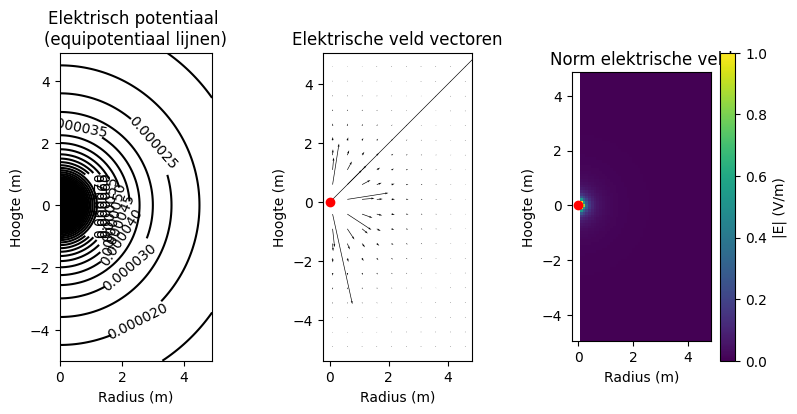

In [3]:
# Run deze cel, pas de cel niet aan
charge_one_point = 1e-14  # lading van 1 punt (C)

r, z, B = initialize_plane_grid_for_pt_charge_at_origin(height_domain, width_domain, grid_step)
V = calculate_V_point_charge_at_origin(charge_one_point, r, z)

Er, Ez, normE = compute_E_pt_charge(V, B, grid_step)  # gebruik de centered finite-difference method
# met Er de r-component, Ez de z-component en normE de norm van het elektrische veld

r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

plot_results_pt_charge_at_origin(Ez, Er, normE, V, r, z, grid_step)


##### Vraag 1a Het potentiaal rond een puntlading

1. Bepaal welke index correspondeert met $z = 0$ m.
2. Plot de log van het potentiaal tegen de log van de straal.
3. Fit de log van het potentiaal met de log van de straal.
4. Print het exponent op een nette manier.

Index voor z = 0 m: 50


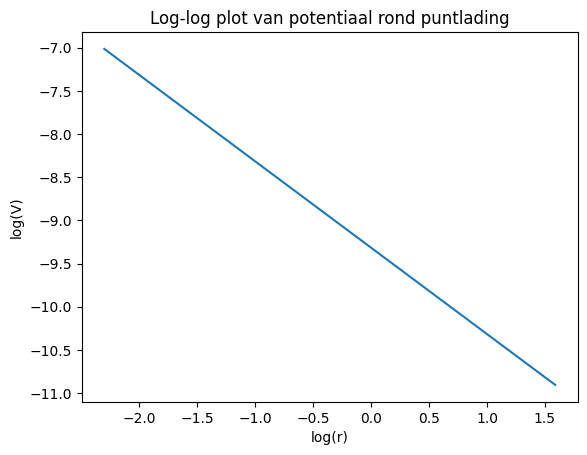

Exponent (helling): -1.000


In [4]:
###
z_index = np.argmin(np.abs(z - 0))
print("Index voor z = 0 m:", z_index)
# z = 0 m ligt op index z_index, dus we nemen de potentiaal V op deze z-index
V_z0 = V[z_index, :]
# r = 0 verwijderen (log niet gedefinieerd)
r0weg = r > 0
r_nonzero = r[r0weg]
V_nonzero = V_z0[r0weg]

# Logaritmes nemen van r en V (voor log-log plot)
log_r = np.log(r_nonzero)
log_V = np.log(np.abs(V_nonzero))

# Plot log(V) vs log(r)
plt.figure()
plt.plot(log_r, log_V)
plt.xlabel("log(r)")
plt.ylabel("log(V)")
plt.title("Log-log plot van potentiaal rond puntlading")
plt.show()

# Fit uitvoeren: log(V) = a log(r) + b
a, b = np.polyfit(log_r, log_V, 1)

# Exponent printen
print(f"Exponent (helling): {a:.3f}")

##### Vraag 1b Het elektrische veld rond een puntlading
1. Voer van vraag 1a 2 tot 4 uit voor het elektrische veld.

Index voor z = 0 m: 49


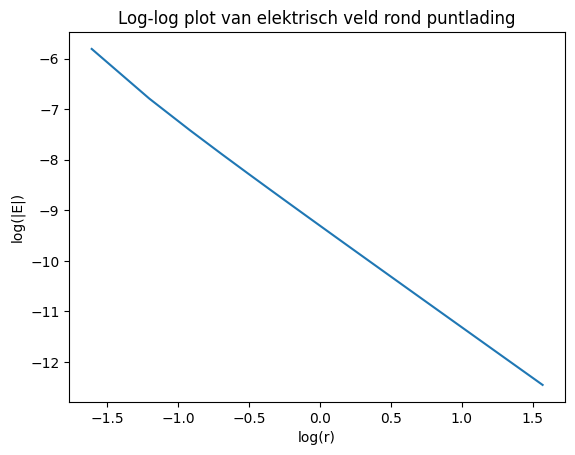

Exponent (helling): -2.040


In [5]:
###
# Index voor z = 0 bepalen
z_index = np.argmin(np.abs(z_for_E - 0))
print("Index voor z = 0 m:", z_index)

# Elektrisch veld langs z = 0
E_z0 = normE[z_index, :]
E0weg = (r_for_E > 0) & (E_z0 > 0)

r_nonzero = r_for_E[E0weg]
E_nonzero = E_z0[E0weg]

log_r = np.log(r_nonzero)
log_E = np.log(E_nonzero)

# Plot log(E) vs log(r)
plt.figure()
plt.plot(log_r, log_E)
plt.xlabel("log(r)")
plt.ylabel("log(|E|)")
plt.title("Log-log plot van elektrisch veld rond puntlading")
plt.show()
# Fit uitvoeren
a, b = np.polyfit(log_r, log_E, 1)

# Exponent printen
print(f"Exponent (helling): {a:.3f}")

### 2) Een uniform geladen schijf bestaande uit puntladingen

In de code hieronder wordt een geladen schijf gemaakt via het superpositie principe. Dit wordt gedaan door een rooster van punten in de ruimte te creëren, alle punten die voldoen aan $z = 0$ m en $r < R$ krijgen een lading charge_one_point en vanuit hier wordt het potentiaal bepaald. Hier is de $z$-as de as van de schijf en de r as de afstand tot de $z$-as.



In [6]:
# In vraag 2.1 wordt naar deze cel verwezen.
disk_radius = 3  # (m)
grid_step = 0.1  # (m)
z_coord_DISK = 0  # (m) positie van de schijf op de z-as
inter_charge_distance = grid_step  # (m) afstand tussen punt ladingen

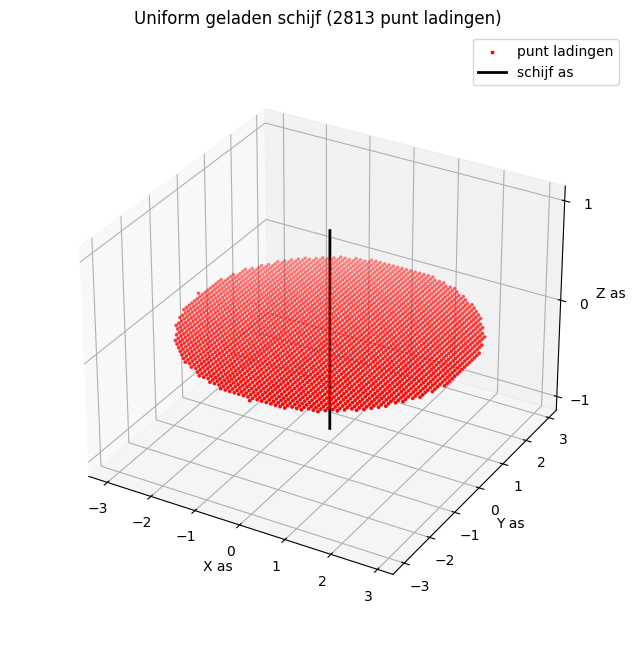

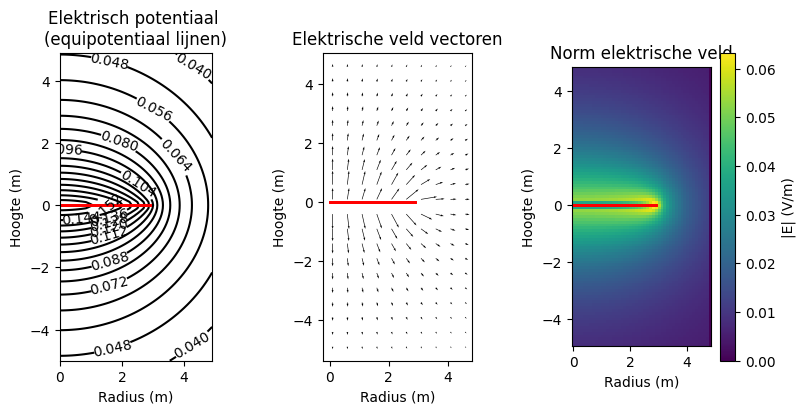

In [7]:
# Kies uit deze cel een van de variabelen en verander die in de cel hierboven pas deze cel zelf niet aan.
r, z, B = initialize_plane_grid_for_uniformly_charged_disk(height_domain, width_domain, grid_step)

idx_z_zero = np.where(abs(z) < 1e-10)[0]
z_coord_DISK = 0  # (m) positie van de schijf op de z-as
inter_charge_distance = grid_step  # (m) afstand tussen punt ladingen

V, number_point_charges_on_disk = calculate_V_disk_at_origin_uniform_surface_charge_density(z_coord_DISK, charge_one_point, disk_radius, inter_charge_distance, r, z)
Er, Ez, normE = compute_E_disk(V, B, grid_step)  # gebruik de centered finite-difference method

r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

plot_results_disk(Ez, Er, normE, V, r, z, grid_step, disk_radius, z_coord_DISK, z_coord_DISK)

#### Vraag 2a

In deze vraag gaan jullie achterhalen wat de variabelen die aan het begin van opgave 2 worden geïnitialiseerd betekenen voor de nauwkeurigheid en snelheid van de code.
Pas voor deze vraag de code die net onder het kopje vraag 2 staat aan. Run dan die cel en de cel daaronder opnieuw om het resultaat van je aanpassing te zien.
1. Wat betekent de disk radius variabele die in de bovenste cel geïnitialiseerd wordt, wat gebeurt er als disk radius naar 0 gaat?
2. Wat betekent gridstep en wat voor impact heeft deze variabele op de simulatie?
3. Pak uit de tweede code cel in opdracht 2 een andere variabelen en onderzoek wat deze variabele doet en wat voor impact die heeft op de simulatie.

##### Antwoorden 2a

1. disk radius is de straal van de geladen schijf. Als disk radius naar 0 gaat, dan krimpt de schijf tot een puntlading.
2. grid_step is de afstand tussen de roosterpunten. Bij een kleine grid step wordt het wel nauwkeuriger, maar veel trager. En bij een grote grid step wordt het minder nauwkeurig maar wel veel sneller.
3. inter_charge_distance bepaalt hoe dicht de puntladingen op de schijf bij elkaar zitten. Kleinere inter_charge_distance betekent kleinere afstand tussen de puntladingen, dat betekent meer puntladingen, waardoor je een betere benadering krijgt van een continue schijf. Een grotere inter_charge_distance leidt dan tot een slechtere benadering van een continue schijf.

#### Vraag 2b Oppervlakte lading

Pas de cel die je in vraag 2a hebt aangepast weer aan naar de originele waardes. Run hierna alle code cellen na vraag 2 weer opnieuw.
Het aantal punten dat gebruikt wordt om de schijf te creëren is number_point_charges_on_disk en de lading van een punt is charge_one_point in Coulomb.
1. Bereken en print de ladingsdichtheid $\sigma$ met een correcte eenheid.

In [8]:
Q_total = number_point_charges_on_disk * charge_one_point
A = np.pi * disk_radius**2
sigma = Q_total / A
print("σ =", sigma, "C/m^2")

σ = 9.948952331500036e-13 C/m^2


##### Vraag 2c

1. Plot het elektrische potentiaal langs de $r$ as ($z = 0$ m).
2. Plot het potentiaal op de rand van de schijf in hetzelfde figuur $V = \sigma R/(\pi \epsilon_0)$
(bekijk probleem 2.51 in het Griffiths' boek)
3. Plot het potentiaal in het centrum van de schijf in hetzelfde figuur $V = \sigma R/(2 \epsilon_0)$

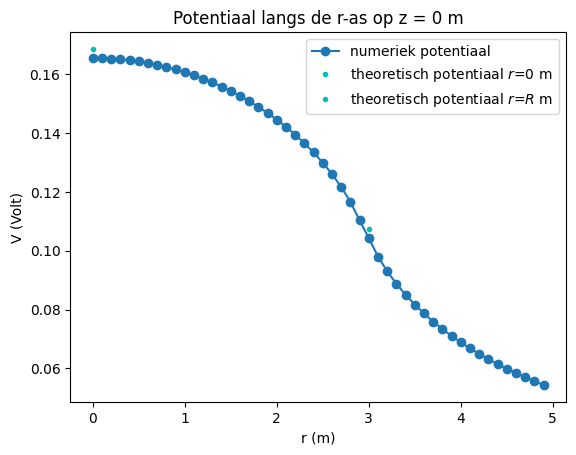

In [9]:
# Vul deze code aan zodat deze vraag 2.3 beantwoord.
idx_z_zero = np.where(abs(z) < 1e-10)[0][0]
epsilon_0 = 8.854e-12

V_0 = sigma * disk_radius / (2*epsilon_0)

V_R =  sigma * disk_radius / (np.pi*epsilon_0)

r_R = disk_radius
plt.title("Potentiaal langs de r-as op z = 0 m")
plt.plot(r, V[idx_z_zero, :], "o-", label="numeriek potentiaal")
plt.plot(0, V_0, "c.", label="theoretisch potentiaal $r$=0 m")
plt.plot(r_R, V_R, "c.", label="theoretisch potentiaal $r$=$R$ m")
plt.legend()
plt.xlabel("r (m)")
plt.ylabel("V (Volt)")
plt.show()


#### Vraag 2d

Het theoretische potentiaal op de as van een hele grote schijf ($R>>z$) is:
$V(z, r=0) = \frac{\sigma}{2\epsilon_0} \big( R - |z|\big)$
zie probleem 2.26 in het Griffiths boek.
1. Plot het numeriek berekend elektrische potentiaal op de $z$-as ($r=0$).
2. Plot het theoretische component van het potentiaal op de as van een schijf met ladingsdichtheid $\sigma$.
3. Sla deze plot op.


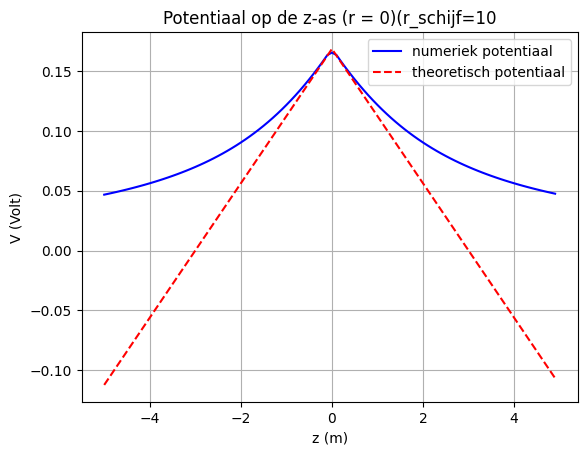

In [10]:
# Numeriek potentiaal 
V_z_num = V[:, 0]     # eerste kolom is r = 0

# Theoretisch potentiaal
V_z_theory = (sigma / (2 * epsilon_0)) * (disk_radius - np.abs(z))

# Numeriek
plt.plot(z, V_z_num, "b-", label="numeriek potentiaal")

# Theoretisch
plt.plot(z, V_z_theory, "r--", label="theoretisch potentiaal")

plt.title("Potentiaal op de z-as (r = 0)(r_schijf=10")
plt.xlabel("z (m)")
plt.ylabel("V (Volt)")
plt.legend()
plt.grid(True)

# Plot opslaan
plt.savefig("vraag2d.png", dpi=300)

plt.show()


#### Vraag 2e

Het theoretische elektrische veld van een oneindig geladen oppervlakte is $|E| = \sigma/(2 \epsilon_0)$ (zie Example 2.5 in het Griffith boek).
1. Plot het z-component van het numeriek berekende elektrische veld op de as van de schijf ($r=0$).
2. Plot het theoretische elektrische veld voor een oneindig geladen oppervlak.
3. Sla deze plot ook op.

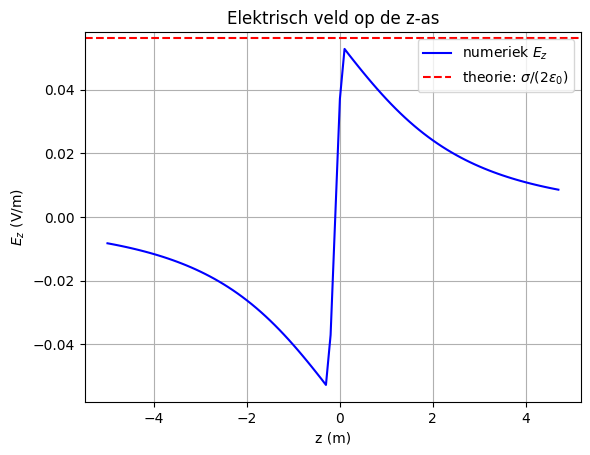

In [11]:
# Numeriek elektrisch veld
E_z_num = Ez[:, 0]

# Bijpassende z-waarden 
z_E = z[:Ez.shape[0]]

# Theoretisch elektrisch veld
E_theory = sigma / (2 * epsilon_0)

# Numerieke plot
plt.plot(z_E, E_z_num, "b-", label="numeriek $E_z$")

# Theoretische plot
plt.axhline(E_theory, color="r", linestyle="--", label=r"theorie: $\sigma/(2\epsilon_0)$")

plt.title("Elektrisch veld op de z-as")
plt.xlabel("z (m)")
plt.ylabel("$E_z$ (V/m)")
plt.legend()
plt.grid(True)

# Plot opslaan
plt.savefig("vraag2e.png", dpi=300)

plt.show()

#### Vraag 2f
1. Waar benadert het elektrische veld van een uniform geladen schijf dat van een oneindig geladen plaat?
2. Beschrijf en verklaar de verschillen die je opvallen in de plot die je bij vraag 2e hebt gemaakt.

##### Antwoorden 2f

1. Bij kleine z waarden benadert de schijft het veld van een uniform geladen schijf dat van een oneindig geladen plaat.
2. Het elektrische veld van een geladen schijf lijkt alleen op dat van een oneindig vlak als je heel dicht bij de schijf zit. In dat gebied merk je de randen bijna niet, waardoor het veld bijna constant is.
In mijn plot zie je dat de blauwe lijn (het numerieke veld van de schijf) onder de rode lijn (het veld van een oneindig vlak) ligt. Dat komt doordat een echte schijf een rand heeft en daardoor minder sterk duwt dan een oneindig vlak. Verder van de schijf af wordt het veld steeds zwakker, terwijl het veld van een oneindig vlak constant blijft. Daarom gaan de twee lijnen niet samen en raken ze elkaar niet.


#### Vraag 2g

1. Pas helemaal bovenaan in vraag 2 de straal van de schijf aan.
2. Voer dan vragen 2d en 2e opnieuw uit.
3. Voeg de opgeslagen figuren hieronder toe.
4. Beschrijf de verschillen tussen de twee verschillende stralen.

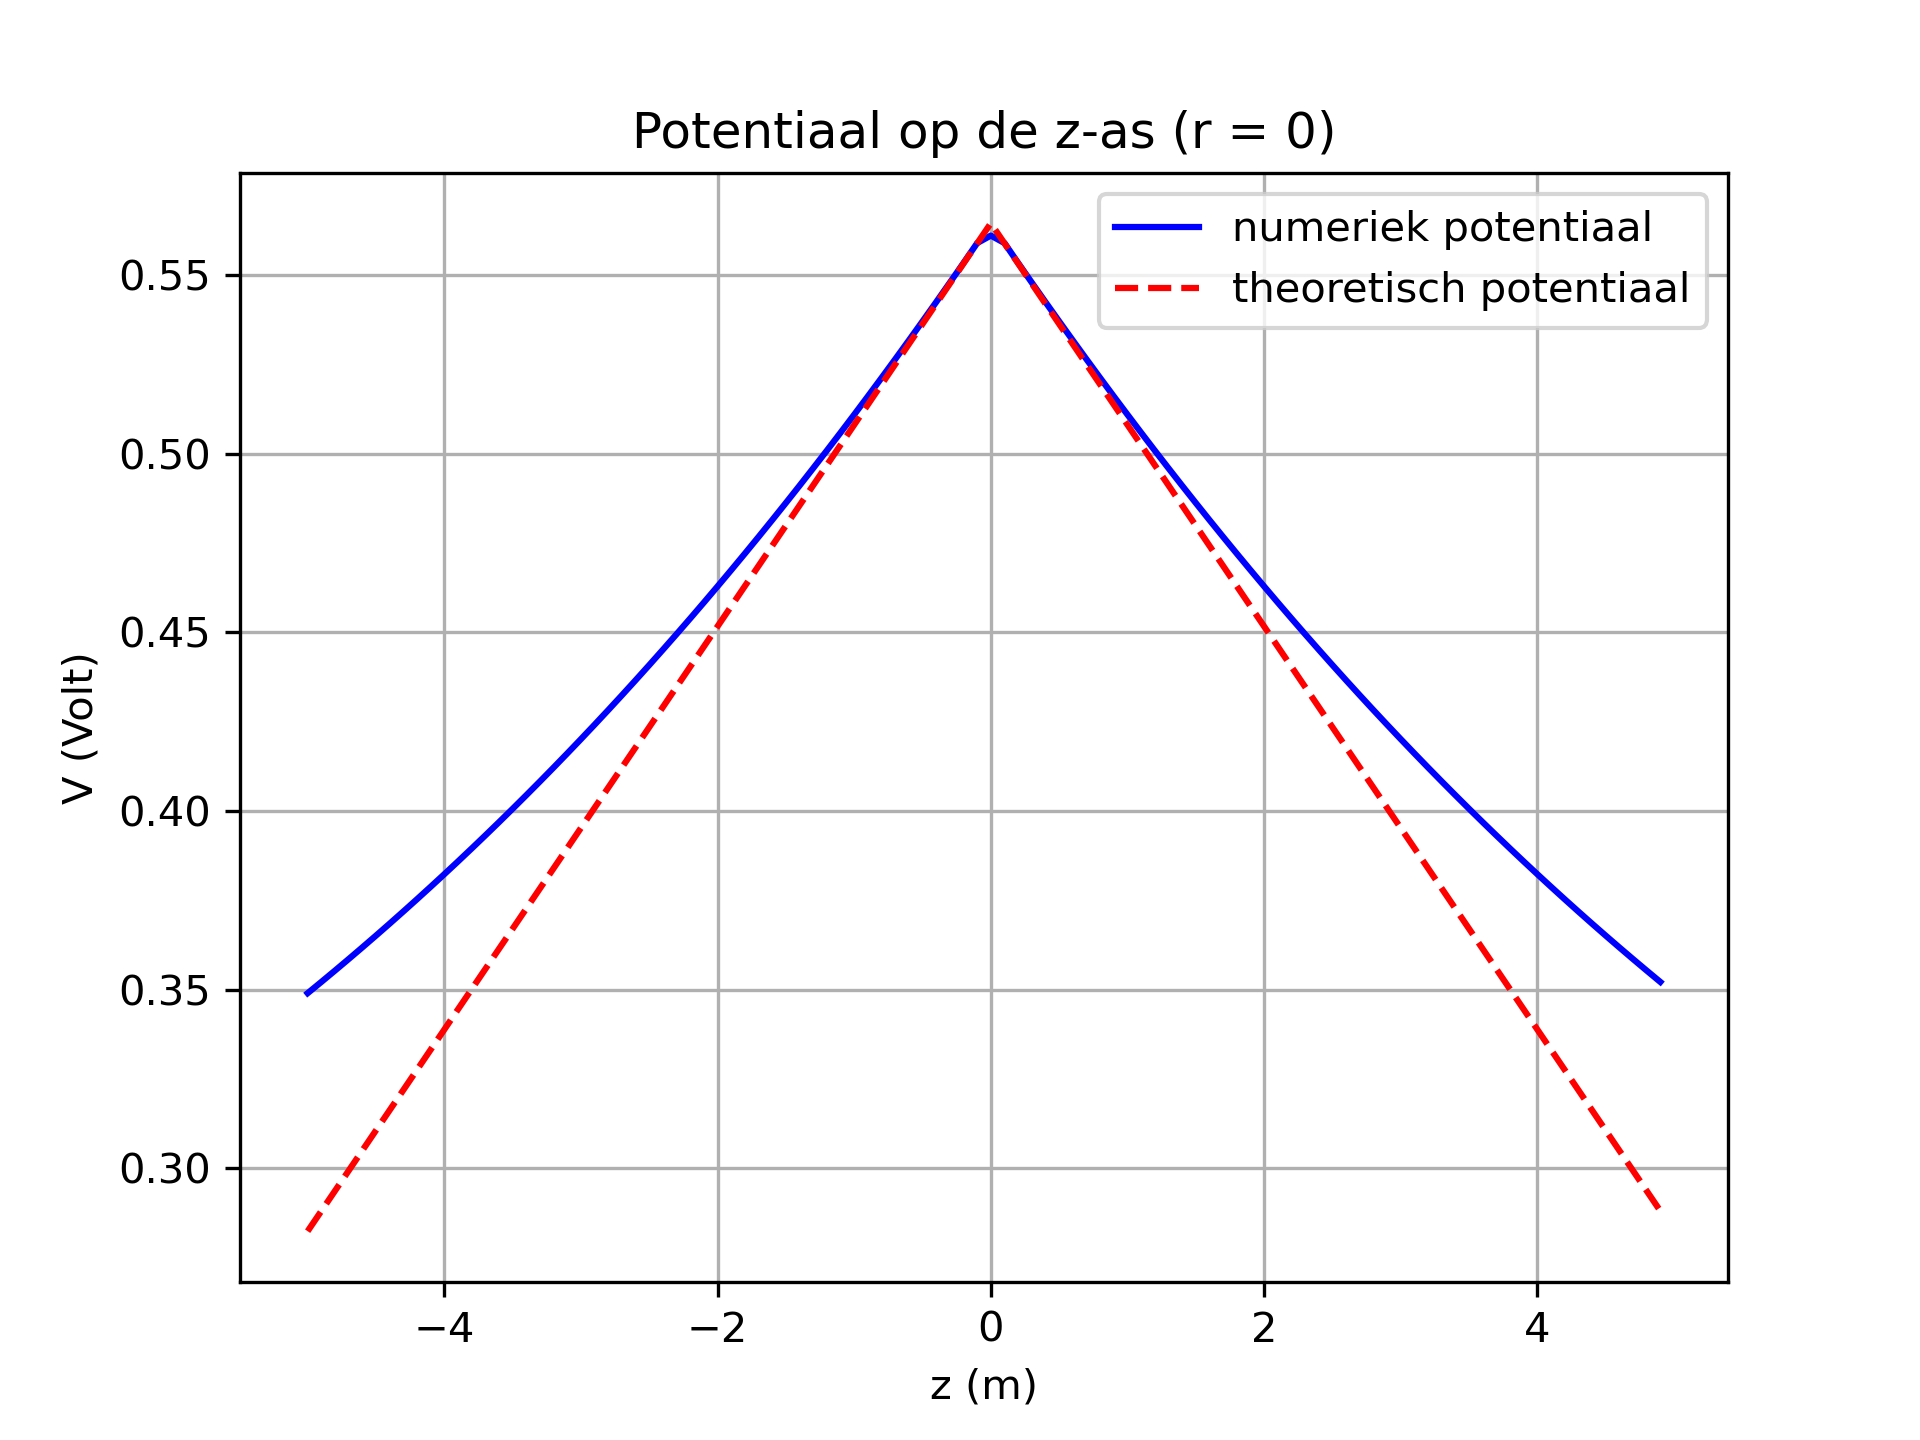

Voor disk_radius = 10


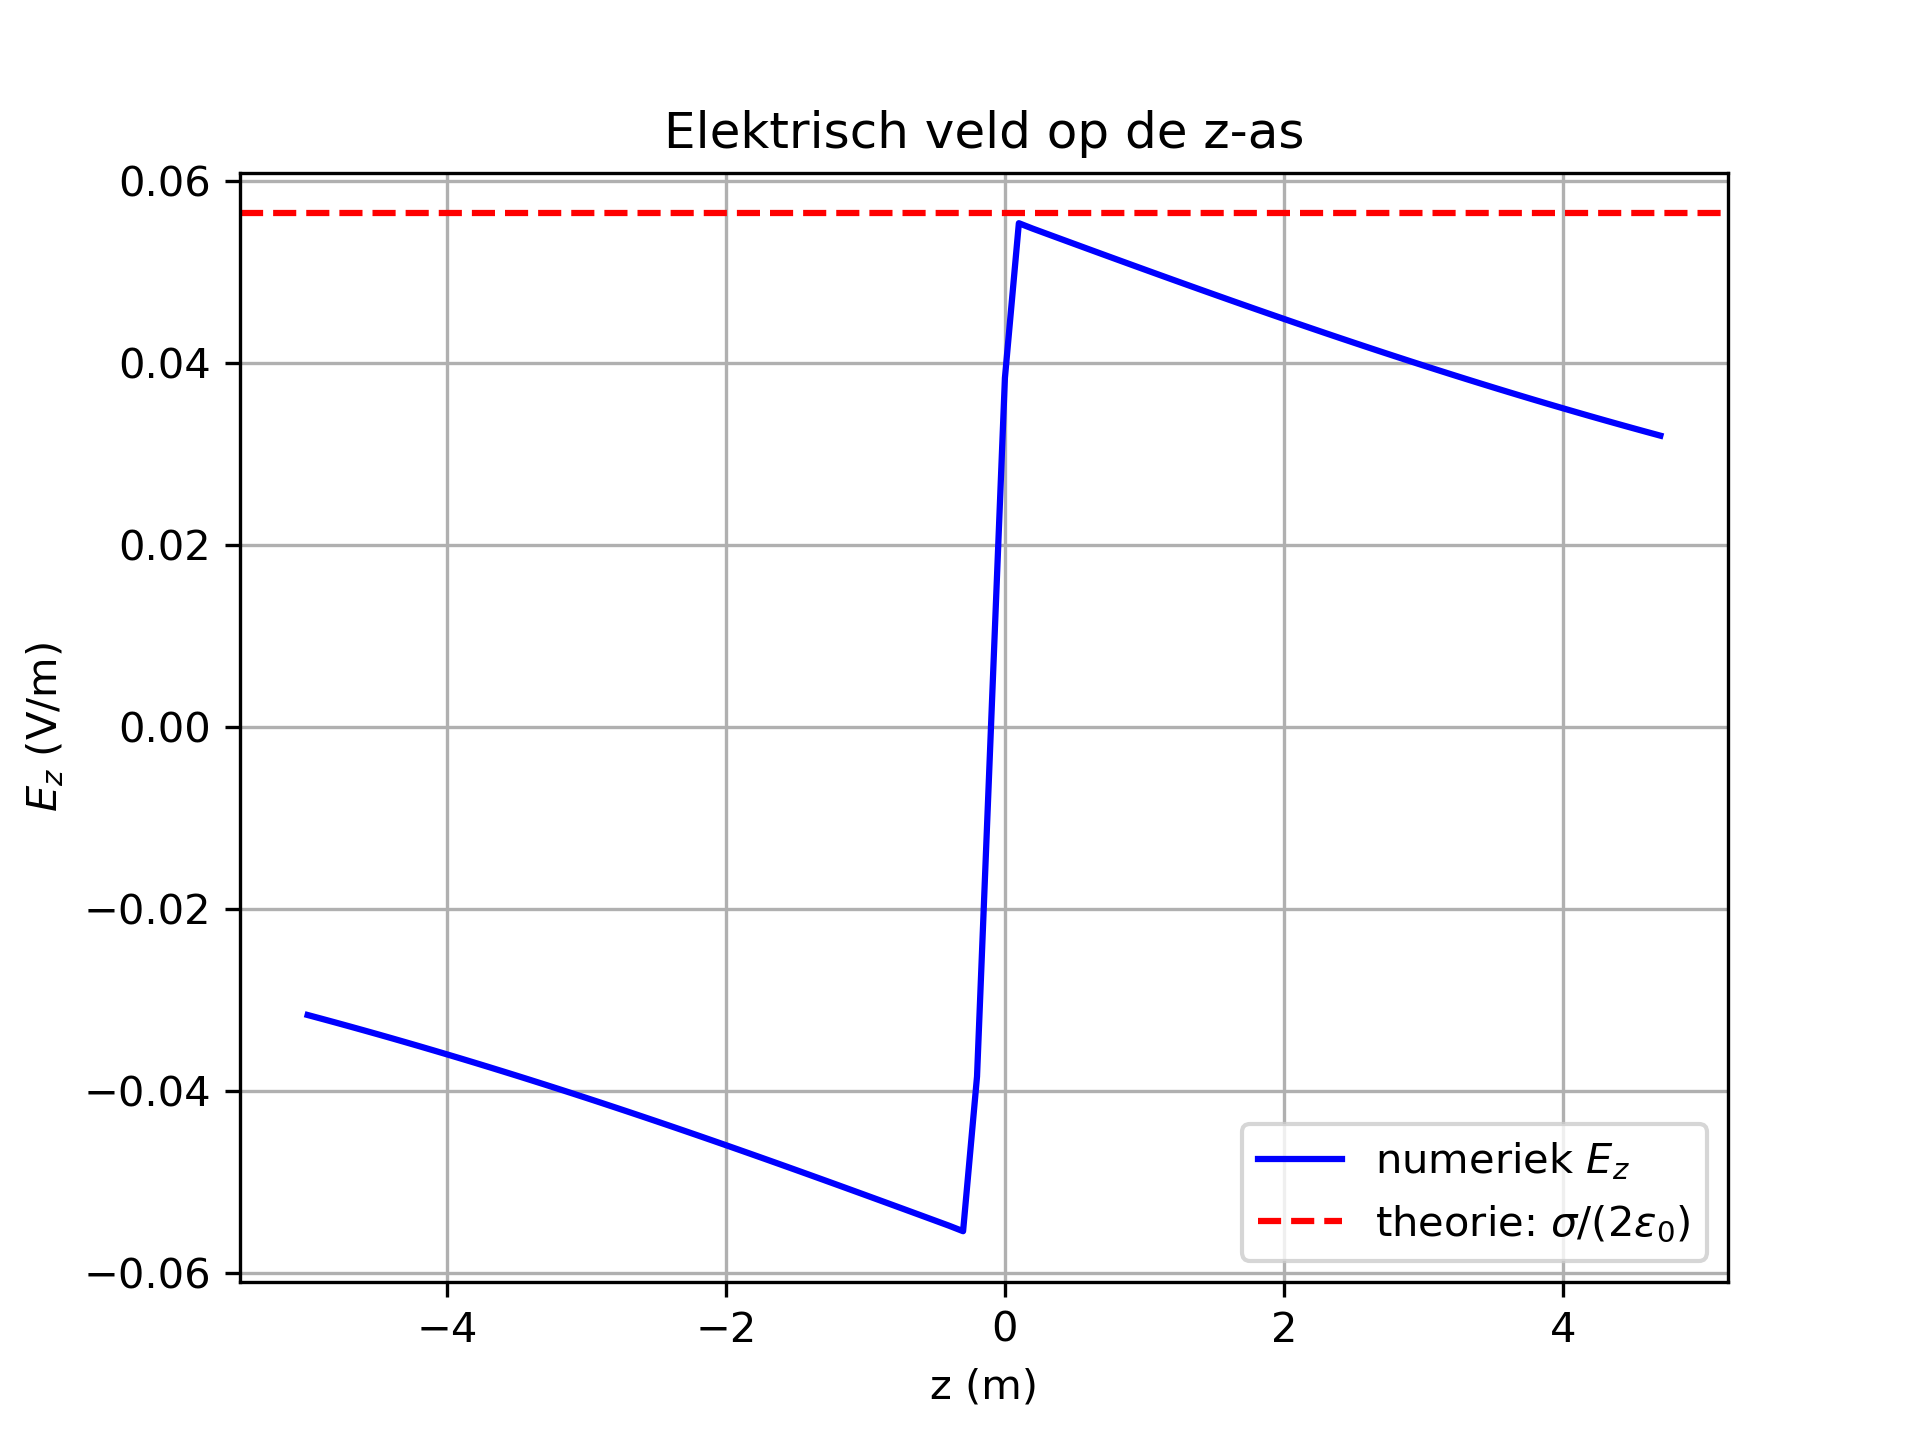

Voor disk_radius = 10


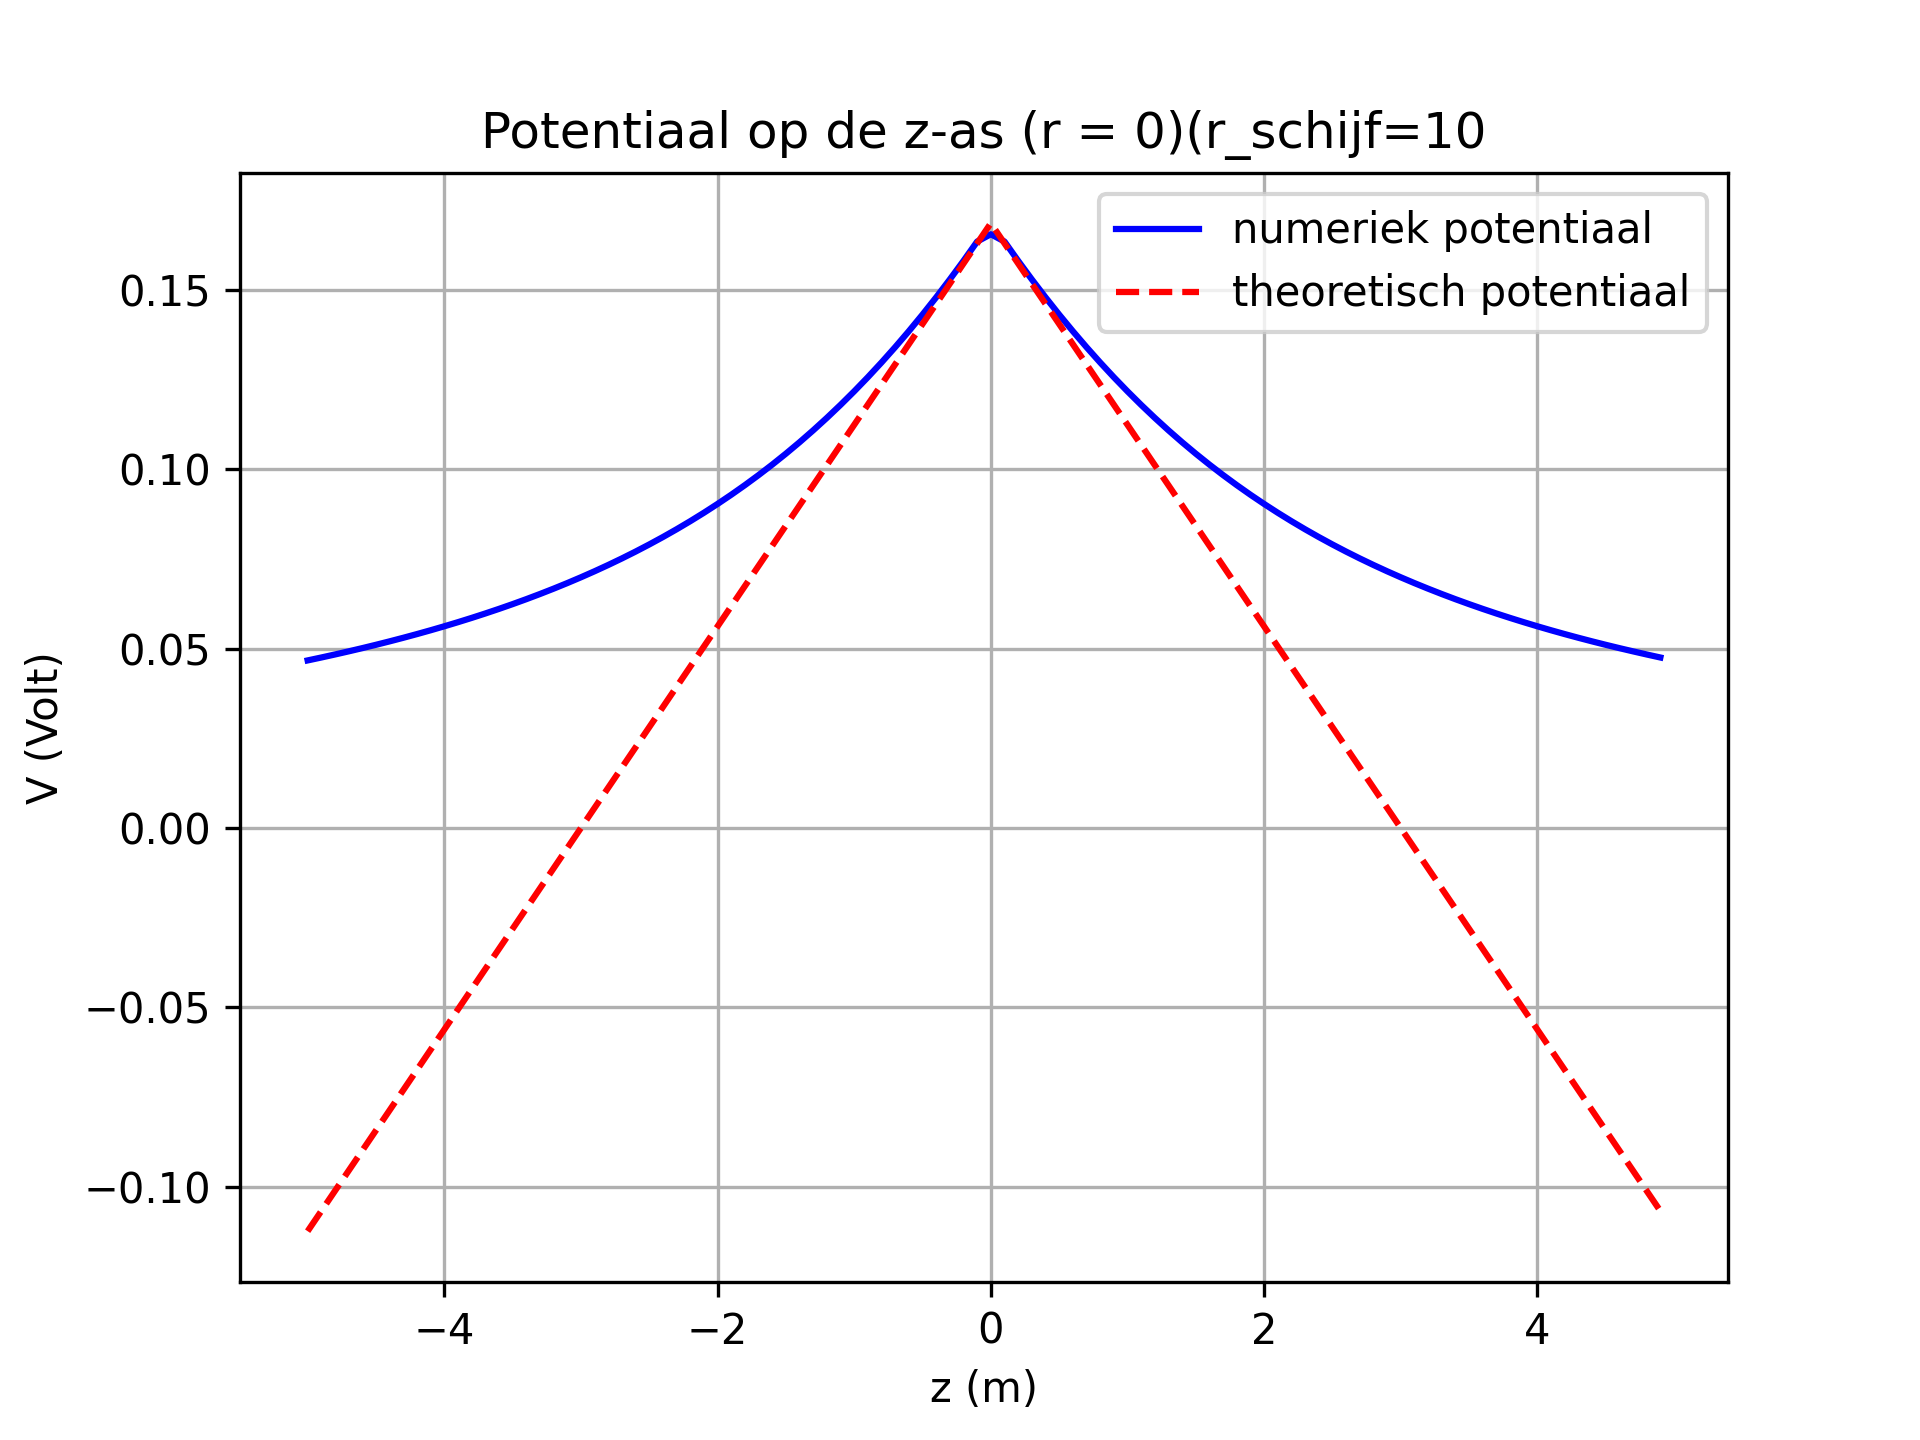

Voor disk_radius = 3


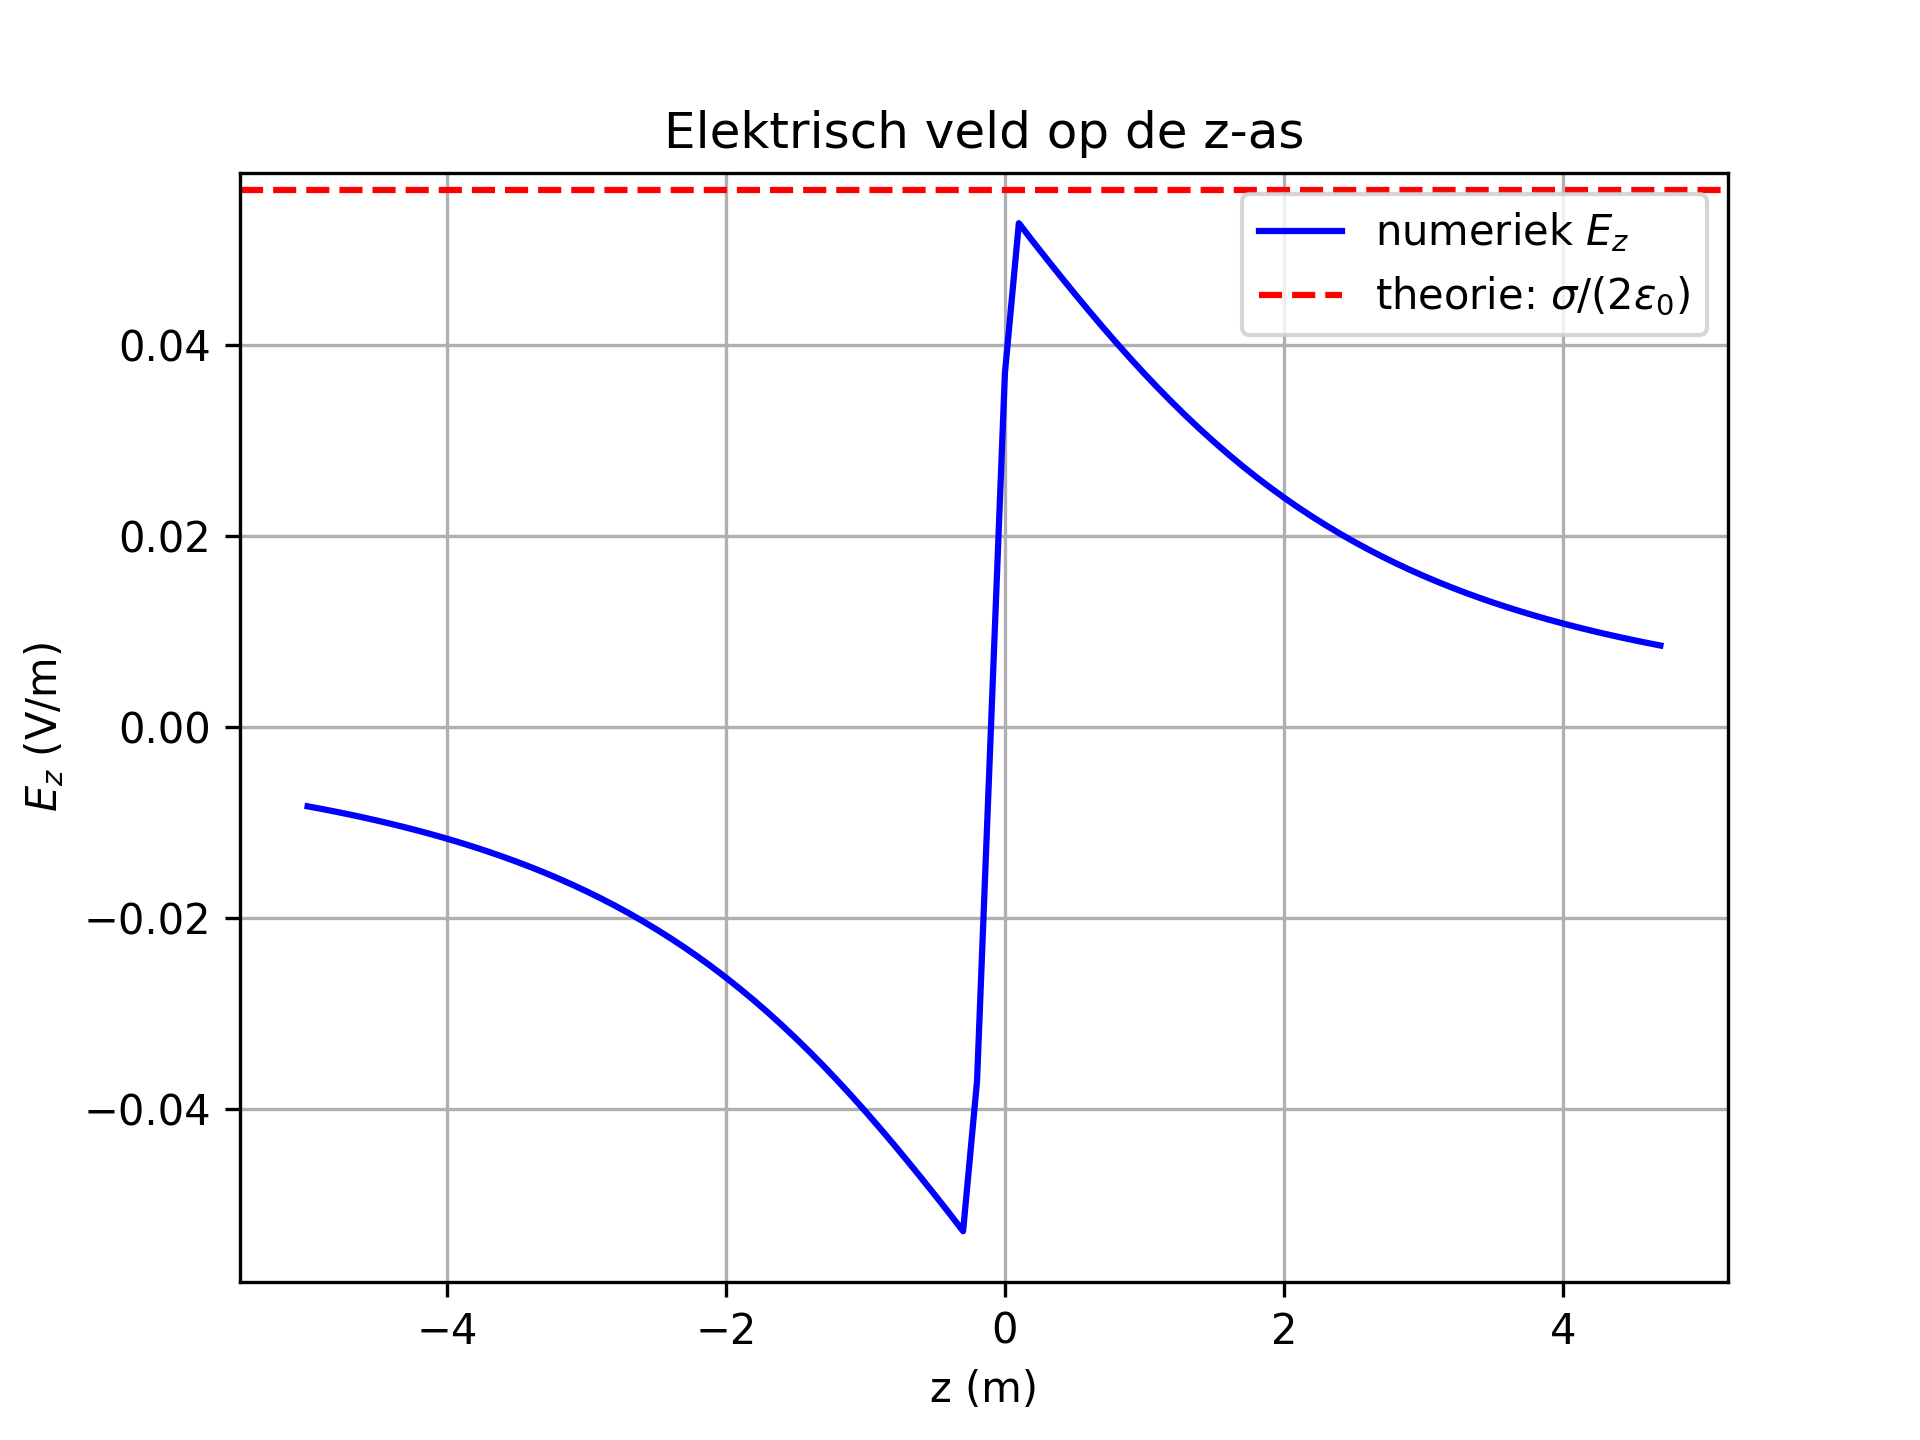

Voor disk_radius = 3


In [12]:
display(Image("vraag2g.png", width=500))
print("Voor disk_radius = 10")
display(Image("vraag2g2.png", width=500))
print("Voor disk_radius = 10")
display(Image("vraag2d.png", width=500))
print("Voor disk_radius = 3")
display(Image("vraag2e.png", width=500))
print("Voor disk_radius = 3")

##### Antwoorden 2g

Bij een grotere straal lijkt de schijf meer op een oneindig vlak. Daardoor liggen het potentiaal en het elektrische veld dichter bij de theoretische waarde en blijven ze langer constant.

#### Vraag 2h
Het elektrische veld een afstand $z$ boven het midden van een uniform geladen schijf met een straal $R$ en oppervlakte lading $\sigma$ wordt gegeven door:
$$ \mathbf{E} = \frac{\sigma}{2\epsilon_0} \bigg[ 1- \frac{z}{\sqrt{R^2 + z^2}}\bigg] \hat{\mathbf{z}}$$
Zie probleem 2.6 in het boek van Griffith.

1. Wat moet de hoogte $z$ zijn boven de schijf zodat het elektrische veld door de schijf 10% is in vergelijking met dat van een oneindig geladen plaat?

Voeg hieronder je analytische uitwerking toe.

### Vraag 2h — Analytische uitwerking

Het elektrische veld op de as van een uniform geladen schijf is:

$$
E(z) = \frac{\sigma}{2\epsilon_0}\left(1 - \frac{z}{\sqrt{z^2 + R^2}}\right)
$$

Voor een oneindig geladen vlak geldt:

$$
E_{\infty} = \frac{\sigma}{2\epsilon_0}
$$

We zoeken de hoogte \(z\) waarvoor:

$$
E(z) = 0.10\,E_{\infty}
$$

De factor $\frac{\sigma}{2\epsilon_0}$ valt weg:

$$
1 - \frac{z}{\sqrt{z^2 + R^2}} = 0.10
$$

$$
\frac{z}{\sqrt{z^2 + R^2}} = 0.90
$$

Kwadrateren:

$$
\frac{z^2}{z^2 + R^2} = 0.81
$$

$$
z^2 = 0.81(z^2 + R^2)
$$

$$
z^2 - 0.81z^2 = 0.81R^2
$$

$$
0.19z^2 = 0.81R^2
$$

$$
z^2 = \frac{0.81}{0.19}R^2 \approx 4.263R^2
$$

$$
z \approx 2.06R
$$

  
De hoogte waarbij het veld van de schijf nog maar 10% is van dat van een oneindig vlak is:

$$
\boxed{z \approx 2.1\,R}
$$


### 3) Een geladen schijf op een constant potentiaal

We zullen nu het verschil bestuderen tussen een uniform geladen schijf en een geleidende schijf die op een bepaald potentiaal gehouden wordt.
De code hieronder lost numeriek de laplace vergelijking op voor een geleidende schijf op een constant potentiaal. Hieruit volgt het potentiaal in de ruimte.

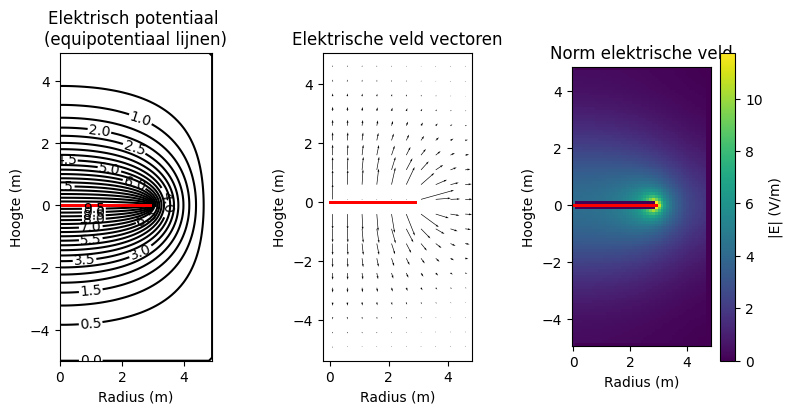

In [13]:
# Run deze cel pas deze niet aan.
V0 = 0  # electric potential at boundary of domain (V)

# Één schijf
z_pos_disk1 = 0  # z-coördinaat van de eerste geleidende schijf (m)
z_pos_disk2 = z_pos_disk1  # z-coördinaat van de tweede geleidende schijf (m)
V1 = 10  # elektrische potentiaal van de eerste geleidende schijf (V)

r, z, r_repmat, V, B, idx_R, idx_z1, idx_z2 = initialize_variables_Laplace(width_domain, disk_radius, height_domain, grid_step, z_pos_disk1, z_pos_disk2, V0, V1, V1)

"""--------------------------------------------------------------------
Veldberekening voor een geleidende schijf
"""
solve_Laplace_equation(V, B, r_repmat, grid_step, idx_z1, idx_z2, idx_R, V1, V1, 1e-3)
Er, Ez, normE = compute_E_disk(V,B,grid_step)
r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

""""---------------------------------------------------------
Plot het berekende veld
"""
plot_results_disk(Ez, Er, normE, V, r, z, grid_step, disk_radius, z_pos_disk1, z_pos_disk2)

#### Vraag 3a: De simulatie van het elektrische veld van een geleidende schijf op constant potentiaal

1. Plot de elektrische veld sterkte op de as van de schijf.
2. Print de norm van het elektrische veld op de as heel dicht bij het midden van de schijf, zorg hier voor een nette opmaak.

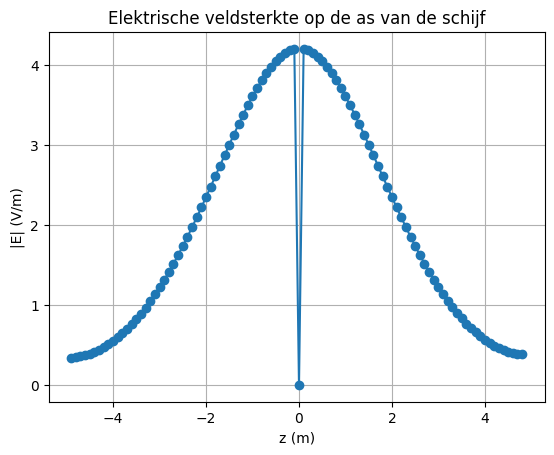

Norm van het elektrische veld dicht bij het midden: 1.521e-05 V/m


In [14]:
# --- vraag 3a -------------------------------------------------------
# de arrays Ez, normE, z_for_E, r_for_E zijn al aangemaakt in de
# eerdere cel waarin de Laplace‑vergelijking werd opgelost.

# 1. veld op de as (r=0 ⇒ eerste kolom van Ez)
E_axis = Ez[:, 0]                 # z‑afhankelijk; r‑index = 0
plt.figure()
plt.plot(z_for_E, np.abs(E_axis), '-o')
plt.xlabel('z (m)')
plt.ylabel('|E| (V/m)')
plt.title('Elektrische veldsterkte op de as van de schijf')
plt.grid(True)
plt.show()

# 2. norm heel dicht bij het midden (r≈0, z≈0)
idx_z0 = np.argmin(np.abs(z_for_E - 0.0))
idx_r0 = 0                         # r_for_E[0] ≃ grid_step
E_near_center = normE[idx_z0, idx_r0]
print(f"Norm van het elektrische veld dicht bij het midden: "
      f"{E_near_center:.3e} V/m")

#### Vraag 3b: De oppervlakte lading in het midden van een geleidende schijf op constant potentiaal

1. Met welke formule kan je de oppervlaktelading benaderen in het midden van de schijf($r=0$, $z=0$)?
2. Print netjes de benadering van de oppervlakte lading in het midden van de schijf.

##### Antwoord 3b

De oppervlaktelading in het midden kan benaderd worden met:
$$\sigma(0) \approx \varepsilon_0 \, E_z(r=0,\; z\to 0^+)$$

Hier is $E_z(r=0,\; z\to 0^+)$ de z‑component van het elektrische veld net buiten het geleideroppervlak.

In [15]:
# Bereken en print de benadering van de oppervlaktelading in het midden van de schijf
# Gebruik het numeriek berekende z‑veld net buiten het oppervlak: sigma ≈ ε0 * E_z
idx_z0 = np.argmin(np.abs(z_for_E - z_pos_disk1))
idx_r0 = 0  # r≈0 (eerste beschikbare r in r_for_E)
sigma_center = epsilon0 * abs(Ez[idx_z0, idx_r0])
print("Benadering oppervlakte lading in het midden (r=0, z=0):")
print(f"σ(0) ≈ ε₀ * |E_z| = {sigma_center:.3e} C/m^2")

Benadering oppervlakte lading in het midden (r=0, z=0):
σ(0) ≈ ε₀ * |E_z| = 1.347e-16 C/m^2


#### Vraag 3c: De oppervlaktelading van een geleidende schijf op constant potentiaal

De oppervlakte lading $\sigma(r)$ van een geleidende schijf met straal $R$ is niet uniform verdeeld over de schijf, maar wordt gegeven door (Problems 2.58 and 2.63 Griffiths 5th edition):
$$\sigma(r) = \frac{Q}{2 \pi R \sqrt{R^2 - r^2}}$$

1. Bereken de totale lading op de schijf met behulp van vraag 3a en 3b.
2. Vergelijk de oppervlakte lading in het centrum van de geleidende schijf met dat van een uniform geladen schijf met dezelfde totale lading.
3. Plot de oppervlakte lading van de geleidende schijf met de berekende lading $Q$, tussen $r = 0$ en $R$.
4. Plot in hetzelfde figuur de oppervlaktelading van een uniform geladen schijf met dezelfde lading $Q$.


Benadering totale lading op de schijf:
Q ≈ 7.618e-15 C

Oppervlaktelading in het centrum:
σ_conductor(0) ≈ 1.347e-16 C/m^2
σ_uniform = 2.694e-16 C/m^2
σ_conductor(0) / σ_uniform = 0.500


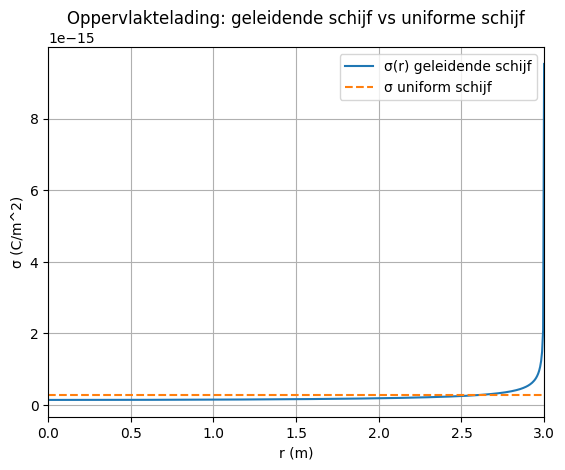

In [16]:
# R: straal van de schijf
R = disk_radius

# sigma_center is berekend in vraag 3b als 'sigma_center'
sigma_center_numeric = sigma_center

# Schatting voor totale lading Q uit σ(0): σ(0) = Q / (2 π R^2) ⇒ Q = 2 π R^2 σ(0)
Q_est = 2 * np.pi * R**2 * sigma_center_numeric

# Oppervlaktelading voor een uniforme schijf met dezelfde totale lading
sigma_uniform = Q_est / (np.pi * R**2)

# Theoretische σ(r) voor een geleidende schijf (Griffiths):
# σ(r) = Q / (2 π R sqrt(R^2 - r^2))
r_vals = np.linspace(0, R * 0.9999, 500)
sigma_conductor = Q_est / (2 * np.pi * R * np.sqrt(R**2 - r_vals**2))

# Netjes afdrukken
print("Benadering totale lading op de schijf:")
print(f"Q ≈ {Q_est:.3e} C")
print("")
print("Oppervlaktelading in het centrum:")
print(f"σ_conductor(0) ≈ {sigma_center_numeric:.3e} C/m^2")
print(f"σ_uniform = {sigma_uniform:.3e} C/m^2")
print(f"σ_conductor(0) / σ_uniform = {sigma_center_numeric/sigma_uniform:.3f}")

# Plotten
plt.figure()
plt.plot(r_vals, sigma_conductor, label='σ(r) geleidende schijf')
plt.hlines(sigma_uniform, 0, R, colors='C1', linestyles='--', label='σ uniform schijf')
plt.xlim(0, R)
plt.xlabel('r (m)')
plt.ylabel('σ (C/m^2)')
plt.title('Oppervlaktelading: geleidende schijf vs uniforme schijf')
plt.legend()
plt.grid(True)
plt.show()

#### Vraag 3d: Het edge effect

1. Bepaal het maximum elektrische veld door de geleidende schijf in de simulatie.
2. Bepaal waar in de ruimte dit maximum zich bevindt.
3. Hoeveel hoger is dit maximum dan het elektrische veld in het midden van de schijf?
4. Print met een nette opmaak de waardes die je hier hebt berekend.
5. Leg uit wat de oorzaak van dit lokaal hoge elektrische veld is?


In [17]:
# Zoek het maximale E en de bijbehorende indices
max_E = np.nanmax(normE)
idx_flat = np.nanargmax(normE)
idx_z_max, idx_r_max = np.unravel_index(idx_flat, normE.shape)

# Bepaal r/z coördinaten die overeenkomen met de shape van normE
# normE heeft shape (Ny, Nx) — de corresponderende r en z waarden nemen we uit r en z
Ny, Nx = normE.shape
r_plot = r[1:1+Nx]
z_plot = z[1:1+Ny]

# Coördinaten van het maximum (veilig via r_plot / z_plot)
r_at_max = r_plot[idx_r_max]
z_at_max = z_plot[idx_z_max]

# Elektrisch veld in het midden (r≈0, z≈disk z)
idx_z0 = np.argmin(np.abs(z_plot - z_pos_disk1))
idx_r0 = np.argmin(np.abs(r_plot - 0.0))
E_center = normE[idx_z0, idx_r0]

# Verhouding en verschil
if E_center == 0:
    ratio = np.inf
    diff = np.nan
else:
    ratio = max_E / E_center
    diff = max_E - E_center

# Netjes uitprinten
print("Maximum elektrisch veld in de simulatie:")
print(f"|E|_max = {max_E:.3e} V/m at r = {r_at_max:.3f} m, z = {z_at_max:.3f} m")
print("")
print("Elektrisch veld in het midden van de schijf (benadering):")
print(f"|E|_center = {E_center:.3e} V/m at r ≈ 0 m, z ≈ {z_pos_disk1:.3f} m")
print("")
if np.isfinite(ratio):
    print(f"Ratio |E|_max / |E|_center = {ratio:.3f}")
    print(f"Verschil: {diff:.3e} V/m")
else:
    print("Ratio: oneindig (|E|_center = 0)")



Maximum elektrisch veld in de simulatie:
|E|_max = 1.175e+01 V/m at r = 3.000 m, z = 0.100 m

Elektrisch veld in het midden van de schijf (benadering):
|E|_center = 1.521e-05 V/m at r ≈ 0 m, z ≈ 0.000 m

Ratio |E|_max / |E|_center = 772488.589
Verschil: 1.175e+01 V/m


##### Antwoord 3d.5

Het lokaal hoge elektrische veld bij de rand van een geleider (het "edge effect") ontstaat doordat ladingen zich vrij kunnen verplaatsen en zich verzamelen waar de kromming of rand het grootst is. Op scherpe randen of bij de rand van een schijf is de oppervlakteplasingsdichtheid groter, waardoor volgens de grensvoorwaarde op een geleider
$$\sigma = \varepsilon_0 E_{\perp}$$
de normale veldcomponent net buiten het oppervlak sterker wordt. In geometrieën met een kleinere radius van kromming (zoals de rand van een schijf) leidt dat tot lokale versterking van het elektrische veld. Hierdoor vinden we in de simulatie een maximum van $|E|$ dicht bij de rand van de schijf.


### 4) Twee geleidende platen op potentiaal $V_1$ and $-V_1$

In de cel hieronder wordt weer op dezelfde manier als in opdracht 3 de laplace vergelijking van deze situatie opgelost.

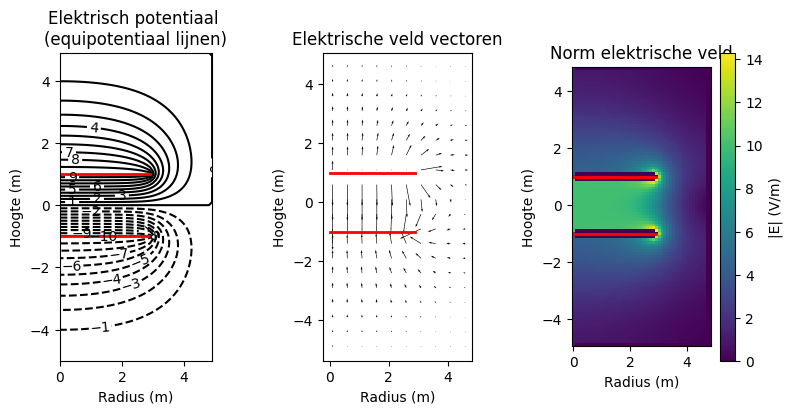

In [18]:
# Run deze cel en pas de cel aan in vraag 4f.
# Voor twee schijven
spacing_between_disks = 2  # (m)
z_pos_disk1 = spacing_between_disks/2  # z-coördinaat van de eerste geleidende schijf (m)
z_pos_disk2 = -spacing_between_disks/2  # z-coördinaat van de tweede geleidende schijf (m)
V1 = 10  # elektrische potentiaal van de eerste geleidende schijf (V)
V2 = -10  # elektrische potentiaal van de tweede geleidende schijf (V)

r, z, r_repmat, V, B, idx_R, idx_z1, idx_z2 = initialize_variables_Laplace(width_domain, disk_radius, height_domain, grid_step, z_pos_disk1, z_pos_disk2, V0, V1, V2)

"""--------------------------------------------------------------------
Veldberekening voor de twee geleidende schijven
"""
solve_Laplace_equation(V, B, r_repmat, grid_step, idx_z1, idx_z2, idx_R, V1, V2, 1e-3)
Er, Ez, normE = compute_E_disk(V, B, grid_step)
r_for_E = r[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de r-dimensie
z_for_E = z[1:-1]  # de centered finite-difference method kan E niet berekenen op het allereerste en allerlaatste gridpunt in de z-dimensie

""""---------------------------------------------------------
Plot het berekende veld
"""
plot_results_disk(Ez, Er, normE, V, r, z, grid_step, disk_radius, z_pos_disk1, z_pos_disk2)


#### Vraag 4a: Het $z$-component van het numeriek berekende elektrische veld van twee geleidende platen

1. Plot het $z$-component van het numeriek berekende elektrische veld op de as van de schijven.


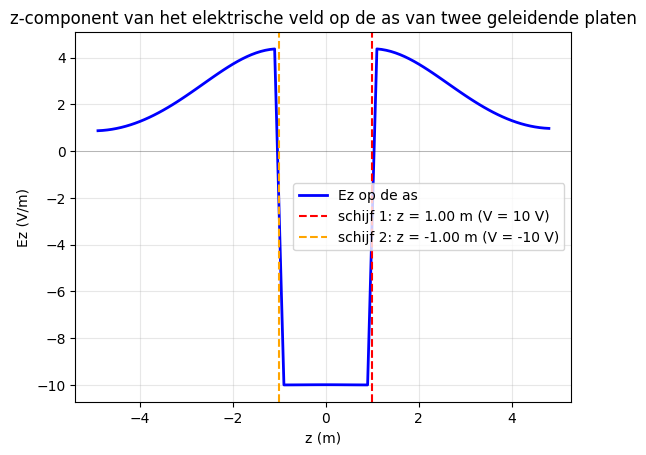

In [19]:
# Vraag 4a: Het z-component van het elektrische veld van twee geleidende platen
# Plot Ez op de as (r=0) van de twee schijven

# Ez op de as (r=0 ⇒ eerste kolom van Ez)
Ez_axis = Ez[:, 0]

# Markeer de posities van de twee schijven
plt.figure()
plt.plot(z_for_E, Ez_axis, 'b-', linewidth=2, label="Ez op de as")
plt.axvline(z_pos_disk1, color='r', linestyle='--', label=f"schijf 1: z = {z_pos_disk1:.2f} m (V = {V1} V)")
plt.axvline(z_pos_disk2, color='orange', linestyle='--', label=f"schijf 2: z = {z_pos_disk2:.2f} m (V = {V2} V)")
plt.axhline(0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.xlabel('z (m)')
plt.ylabel('Ez (V/m)')
plt.title('z-component van het elektrische veld op de as van twee geleidende platen')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

#### Vraag 4b: Verschillen tussen verschillende configuraties

1. Gegeven het potentiaal tussen twee geleidende platen, wat is het theoretische elektrische veld in elke regio? Laat dit zien met een afleiding en een schets die de verschillende regio's aangeeft.
2. Beschrijf het numeriek berekende elektrische veld op de as van de schijven, komt dit overeen met het theoretische elektrische veld?
3. Vergelijk het numeriek berekende elektrische veld tussen de twee schijven ($r=0$ and $z=0$) met dat van een enkele geleidende schijf op hetzelfde potentiaal(vraag 3a), welk voordeel heeft deze configuratie?

##### Antwoorden 4b
1. buiten de platen is het veld bijna nul, en tussen de platen is het veld constant. Dat komt doordat het potentiaal tussen de platen lineair verandert. De drie regio’s: nul veld onder de onderste plaat, een vlak constant veld tussen de platen, en weer nul veld boven de bovenste plaat.

2. Tussen de schijven zie je een bijna vlak stuk in de grafiek, wat betekent dat het veld daar bijna constant is. Buiten de schijven zakt het veld naar nul. Alleen bij de randen zie je kleine afwijkingen, omdat de schijven niet oneindig groot zijn.

3. Bij één schijf is het veld sterk vlakbij de schijf, maar neemt het snel af als je verder weg gaat. Bij twee schijven versterken de velden elkaar tussen de platen, waardoor je een veel sterker elektrisch veld krijgt. Hierdoor vormen twee platen samen een goede condensator.

#### Vraag 4c: De capaciteit tussen twee geleidende platen

1. Bepaal de verwachte oppervlakte lading op de binnenzijde van een van de schijven.
2. Bepaal de verwachte totale lading op beide schijven.
3. Bepaal de capaciteit van deze situatie.
4. Print alle bepaalde waardes op een nette en overzichtelijke manier.

In [20]:
# Afstand tussen platen
d = abs(z_pos_disk1 - z_pos_disk2)

# Potentiaalverschil
dV = V1 - V2  

# Theoretisch elektrisch veld tussen platen 
E_theory = dV / d 

# Oppervlakte van schijf
A_disk = np.pi * disk_radius**2  

# Oppervlaktelading binnenzijde schijf
sigma_inner = epsilon0 * E_theory  

# Totale lading binnenzijde schijf
Q_one_disk = sigma_inner * A_disk  

# Totale lading beide schijven 
Q_total_abs = 2 * abs(Q_one_disk)  

# Capaciteit van deze situatie 
C_cap = abs(Q_one_disk) / abs(dV) 

# prints
print(f"Oppervlaktelading σ   = {sigma_inner:.4e} C/m^2")
print(f"Lading op een schijf Q             = {Q_one_disk:.4e} C")
print(f"Totale lading op beide schijven  = {Q_total_abs:.4e} C")
print(f"Capaciteit C                       = {C_cap:.4e} F")


Oppervlaktelading σ   = 8.8540e-11 C/m^2
Lading op een schijf Q             = 2.5034e-09 C
Totale lading op beide schijven  = 5.0068e-09 C
Capaciteit C                       = 1.2517e-10 F


#### Vraag 4d: Theoretische oppervlakte lading

1. Is de oppervlaktelading aan de buitenkant van de schijven gelijk aan nul, beargumenteer waarom wel of niet.
2. Wat is het elektrische veld nabij het oppervlak van een geleider?

##### Antwoorden 4d

1. ja de oppervlaktelading aan de buitenkant is 0, want daar heffen de velden van beide schijven elkaar op.
2. Het elektrich veld nabij het oppervlak van een geleider is gelijk aan: oppervlaktelading gedeeld door $\epsilon_0$.

#### Vraag 4e: Numeriek berekende ladingsdichtheid

1. Welke waarde heeft het $z$-component van het elektrische veld, op de as van de schijf net onder de onderste schijf.
2. Wat is volgens de formule uit vraag 4d 2 de ladingsdichtheid aan de onderkant van de onderste geleidende plaat.
3. Welke waarde heeft het $z$-component van het elektrische veld, op de as van de schijf net boven de onderste schijf.
4. Wat is volgens de formule uit vraag 4d 2 de ladingsdichtheid aan de bovenkant van de onderste geleidende plaat.
5. Print de bepaalde waardes op een nette en overzichtelijke manier.

In [21]:
# Positie onderste schijf
z_disk = z_pos_disk2

# index schijf in z-rooster
idx = np.argmin(np.abs(z_for_E - z_pos_disk2))


# Ez op as
Ez_axis = Ez[:, 0]

# Ez net onder en net boven de schijf
Ez_below = Ez_axis[idx - 1]  
Ez_above = Ez_axis[idx + 1]   

# Ladingsdichtheden
sigma_below = epsilon0 * Ez_below
sigma_above = epsilon0 * Ez_above

# prints

print(f"Ez net ONDER de onderste schijf            : {Ez_below:.4e} V/m")
print(f"Ladingsdichtheid onderkant                 : {sigma_below:.4e} C/m²\n")

print(f"Ez net BOVEN de onderste schijf            : {Ez_above:.4e} V/m")
print(f"Ladingsdichtheid bovenkant                 : {sigma_above:.4e} C/m²\n")

Ez net ONDER de onderste schijf            : 4.3767e+00 V/m
Ladingsdichtheid onderkant                 : 3.8751e-11 C/m²

Ez net BOVEN de onderste schijf            : -1.0004e+01 V/m
Ladingsdichtheid bovenkant                 : -8.8576e-11 C/m²



#### Vraag 4f: Conclusies over de ladingsdichtheid op de twee schijven

1. Wat kan je uit vraag 4d en e concluderen over de daadwerkelijke lading op een schijf in tegenstelling tot de berekende lading in vraag 4c?
2. Wat is de invloed hiervan op de capaciteit berekend in vraag 4c?
3. Run de cel net onder het kopje vraag 4 opnieuw, maar dan met een kleinere afstand tussen de schijven, wat verandert er?

##### Antwoorden 4f

Uit vraag 4d en 4e blijkt dat bijna alle lading op de binnenkant van de schijven zit, omdat daar het elektrische veld sterk is. Aan de buitenkant is het veld bijna nul, dus daar zit bijna geen lading. De theoretische berekening in vraag 4c gaat uit van een perfect uniform veld, waardoor de berekende lading wat te groot is. Daardoor wordt ook de capaciteit in vraag 4c te hoog.

Als je dezelfde simulatie uitvoert met een kleinere afstand tussen de schijven, wordt het veld tussen de platen sterker en gelijkmatiger. De schijven gaan zich dan meer gedragen als platen. Hierdoor neemt de ladingsdichtheid toe, worden rand‑effecten kleiner en stijgt de capaciteit.

### 5) Voorbereidende opdracht voor de fysieke DEF ontwerpopdracht

In deze vraag zullen we ingaan op benodigde voorkennis voor de fysieke ontwerpopdracht "Maak een sensor met condensatoren". De formules die je in deze opdracht opstelt, heb je nodig gedurende de fysieke ontwerpopdracht.

In deze vraag zullen we kijken naar de ideale vlakke plaat condensator. Als de afstand tussen de platen veel kleiner is dan de grootte van de platen dan wordt de aanname gemaakt dat het veld tussen de platen constant is. Deze aanname zal niet helemaal overeenkomen met de werkelijkheid, zoals je in deze opdracht en de fysieke DEF ontwerpopdracht achter zal komen.

#### Vraag 5a: Functies voor de capaciteit van enkele opdrachten

1. Vind de formule voor de capaciteit van een vlakke plaat condensator en een cilinder condensator, onder de aanname dat de afstand tussen de platen veel kleiner is dan het oppervlakte van de condensator (vlakke plaat aanname).
2. Schrijf een python functie die de relevante parameters als input neemt en de capaciteit van een vlakke plaat condensator als output heeft.
3. Vind de formule voor de capaciteit van een cilinder condensator onder de aanname dat de afstand tussen de binnen en buiten wand klein is.
4. Schrijf een python functie die de relevante parameters als input neemt en de capaciteit van een cilinder condensator als output heeft.

In [1]:
# Constante
epsilon0 = 8.854e-12  # F/m

def vlakkeplaat(A, d, epsilon_r=1):
    """
    Bereken de capaciteit van een vlakke plaat condensator.
    
    Parameters:
    -----------
    A : float or array
        Oppervlakte van één plaat (m²)
    d : float or array
        Afstand tussen de platen (m)
    epsilon_r : float or array, optional
        Relatieve permittiviteit van het diëlektricum (default: 1 voor lucht)
    
    Returns:
    --------
    C : float or array
        Capaciteit (F)
    
    Formule: C = ε₀ εᵣ A / d
    """
    C = epsilon0 * epsilon_r * A / d
    return C

def cilinder(L, r_inner, r_outer, epsilon_r=1):
    """
    Bereken de capaciteit van een cilinder condensator.
    Voor kleine spleet: C ≈ 2π ε₀ εᵣ L rᵢ / (rₒ - rᵢ)
    
    Parameters:
    -----------
    L : float or array
        Lengte van de cilinder (m)
    r_inner : float or array
        Binnenradius (m)
    r_outer : float or array
        Buitenradius (m)
    epsilon_r : float or array, optional
        Relatieve permittiviteit van het diëlektricum (default: 1 voor lucht)
    
    Returns:
    --------
    C : float or array
        Capaciteit (F)
    
    Formule (kleine spleet): C = 2π ε₀ εᵣ L rᵢ / Δr
    """
    delta_r = r_outer - r_inner
    C = 2 * np.pi * epsilon0 * epsilon_r * L * r_inner / delta_r
    return C

#### Vraag 5b: Capaciteit van enkele simpele condensatoren

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.
Hieronder staan een aantal condensatoren waarvoor jullie de capaciteit gaan berekenen. Print de capaciteit van elke condensator op een nette en overzichtelijke manier.
1. Bereken de capaciteit van een condensator gemaakt van twee vierkante plaatjes van 10 bij 10 cm met een plaatafstand van 1 mm en lucht als medium?
2. Bereken de capaciteit van een cilinder condensator met een binnendiameter van 9 mm en een buitendiameter van 10 mm met een lengte van 10 cm en lucht als medium?
3. Bereken de capaciteit van de condensatoren als de afstand tussen de platen verdubbeld
4. Bereken de capaciteit van de condensatoren uit 1 en 2 hierboven beschreven als ze gevuld zijn met water.
5. Bereken de capaciteit van de condensatoren uit 1 en 2 hierboven als de holte gevuld is met PVC.


In [22]:
# Relatieve permittiviteiten
epsilon_r_lucht = 1.0
epsilon_r_water = 80.0
epsilon_r_PVC = 3.5

# 1. Vlakke plaat: 10x10 cm, 1 mm afstand, lucht
A1 = 0.1 * 0.1  # (m²)
d1 = 1e-3  # (m)
C1_lucht = vlakkeplaat(A1, d1, epsilon_r_lucht)
print("1. Vlakke plaat condensator (10×10 cm, 1 mm afstand):")
print(f"   Lucht:  C = {C1_lucht:.3e} F = {C1_lucht*1e12:.2f} pF")

# 2. Cilinder condensator: binnendiameter 9 mm, buitendiameter 10 mm, lengte 10 cm, lucht
L2 = 0.1  # (m)
r_inner2 = 4.5e-3  # (m)
r_outer2 = 5e-3  # (m)
C2_lucht = cilinder(L2, r_inner2, r_outer2, epsilon_r_lucht)
print("2. Cilinder condensator (d_in=9 mm, d_out=10 mm, L=10 cm):")
print(f"   Lucht:  C = {C2_lucht:.3e} F = {C2_lucht*1e12:.2f} pF")

# 3. Capaciteit als afstand verdubbeld
d1_verdubbeld = 2e-3  # (m)
C1_verdubbeld = vlakkeplaat(A1, d1_verdubbeld, epsilon_r_lucht)
print("3. Capaciteit met verdubbelde afstand:")
print(f"   Vlakke plaat (2 mm afstand):  C = {C1_verdubbeld:.3e} F = {C1_verdubbeld*1e12:.2f} pF")
print(f"   Verhouding C_verdubbeld / C_origineel = {C1_verdubbeld/C1_lucht:.3f}")
# 4. Capaciteit met water (epsilon_r ≈ 80)
C1_water = vlakkeplaat(A1, d1, epsilon_r_water)
C2_water = cilinder(L2, r_inner2, r_outer2, epsilon_r_water)
print("4. Capaciteit gevuld met water (ε_r = 80):")
print(f"   Vlakke plaat: C = {C1_water:.3e} F = {C1_water*1e12:.2f} pF")
print(f"   Cilinder:     C = {C2_water:.3e} F = {C2_water*1e12:.2f} pF")
print(f"   Verhouding (water/lucht) = {C1_water/C1_lucht:.1f} × (vlakke plaat)")

# 5. Capaciteit met PVC (epsilon_r ≈ 3.5)
C1_PVC = vlakkeplaat(A1, d1, epsilon_r_PVC)
C2_PVC = cilinder(L2, r_inner2, r_outer2, epsilon_r_PVC)
print("5. Capaciteit gevuld met PVC (ε_r = 3.5):")
print(f"   Vlakke plaat: C = {C1_PVC:.3e} F = {C1_PVC*1e12:.2f} pF")
print(f"   Cilinder:     C = {C2_PVC:.3e} F = {C2_PVC*1e12:.2f} pF")
print(f"   Verhouding (PVC/lucht) = {C1_PVC/C1_lucht:.1f} × (vlakke plaat)")

1. Vlakke plaat condensator (10×10 cm, 1 mm afstand):
   Lucht:  C = 8.854e-11 F = 88.54 pF
2. Cilinder condensator (d_in=9 mm, d_out=10 mm, L=10 cm):
   Lucht:  C = 5.007e-11 F = 50.07 pF
3. Capaciteit met verdubbelde afstand:
   Vlakke plaat (2 mm afstand):  C = 4.427e-11 F = 44.27 pF
   Verhouding C_verdubbeld / C_origineel = 0.500
4. Capaciteit gevuld met water (ε_r = 80):
   Vlakke plaat: C = 7.083e-09 F = 7083.20 pF
   Cilinder:     C = 4.005e-09 F = 4005.46 pF
   Verhouding (water/lucht) = 80.0 × (vlakke plaat)
5. Capaciteit gevuld met PVC (ε_r = 3.5):
   Vlakke plaat: C = 3.099e-10 F = 309.89 pF
   Cilinder:     C = 1.752e-10 F = 175.24 pF
   Verhouding (PVC/lucht) = 3.5 × (vlakke plaat)


#### Vraag 5c: Condensatoren uit het dagelijkse leven

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.
Hieronder is een foto te zien van condensatoren die in het dagelijkse leven gebruikt wordt.
Print de capaciteiten in deze vraag op een nette en overzichtelijke manier.
1. In figuur 5.1 is een condensator te zien van 1 $\micro$F, stel deze condensator kan geapproximeerd worden als een cilinder condensator met binnendiameter 5 mm en een buitendiameter van 6 mm. Bereken wat de lengte van de condensator dan zou zijn.
Stel dat we een vierkante plaat condensator hebben van 1 $\micro$F.
2. Bereken hoe lang de vlakke plaat condensator moet zijn als er 0.5 mm tussen de platen zit en de platen 6 mm breed zijn.

![figure 5.1](figures/Condensator_1_uF.jpg)

##### Figure: 5.1 Een 1 microfarad condensator.

In [25]:
# Gegeven capacitantie
C_gegeven = 1e-6  # 1 µF in Farad

# 1. Cilinder condensator: C = 1 µF, d_inner = 5 mm, d_outer = 6 mm
#    C = 2π·ε₀·ε_r·L·r_inner / Δr
#    L = C·Δr / (2π·ε₀·ε_r·r_inner)

d_inner_cilinder = 5e-3  # m
d_outer_cilinder = 6e-3  # m
r_inner_cilinder = d_inner_cilinder / 2
r_outer_cilinder = d_outer_cilinder / 2
delta_r_cilinder = r_outer_cilinder - r_inner_cilinder

L_cilinder = C_gegeven * delta_r_cilinder / (2 * np.pi * epsilon0 * epsilon_r_lucht * r_inner_cilinder)

print("1. Cilinder condensator (C = 1 µF):")
print(f"   D_inner = {d_inner_cilinder*1e3:.1f} mm, D_outer = {d_outer_cilinder*1e3:.1f} mm")
print(f"   Berekende lengte: L = {L_cilinder:.3f} m = {L_cilinder*100:.1f} cm = {L_cilinder*1000:.0f} mm")

# 2. Vlakke plaat condensator: C = 1 µF, d = 0.5 mm, b = 6 mm
#    C = ε₀·ε_r·A / d = ε₀·ε_r·(b·L) / d
#    L = C·d / (ε₀·ε_r·b)

d_plaat = 0.5e-3  # m
b_plaat = 6e-3    # m (breedte, width)

L_plaat = C_gegeven * d_plaat / (epsilon0 * epsilon_r_lucht * b_plaat)

print("2. Vlakke plaat condensator (C = 1 µF):")
print(f"   Tusssenruimte d = {d_plaat*1e3:.1f} mm, Breedte b = {b_plaat*1e3:.1f} mm")
print(f"   Berekende lengte: L = {L_plaat:.3f} m = {L_plaat*100:.1f} cm = {L_plaat*1000:.0f} mm")
print(f"  Cilinder condensator zou {L_cilinder:.2f} m lang moeten zijn")
print(f"  Vlakke plaat condensator zou {L_plaat:.2f} m lang moeten zijn")

1. Cilinder condensator (C = 1 µF):
   D_inner = 5.0 mm, D_outer = 6.0 mm
   Berekende lengte: L = 3595.097 m = 359509.7 cm = 3595097 mm
2. Vlakke plaat condensator (C = 1 µF):
   Tusssenruimte d = 0.5 mm, Breedte b = 6.0 mm
   Berekende lengte: L = 9411.942 m = 941194.2 cm = 9411942 mm
  Cilinder condensator zou 3595.10 m lang moeten zijn
  Vlakke plaat condensator zou 9411.94 m lang moeten zijn


#### Vraag 5d: Hoge capaciteit condensatoren

1. Beargumenteer of je antwoorden uit vraag 5c realistisch zijn.
2. Bekijk je formule uit vraag 5a en bedenk hoe ze dit binnen in de condensator opgelost hebben.

#### 1. Zijn de antwoorden uit vraag 5c realistisch?

Nee, de berekende lengtes zijn onrealistisch:
- Cilinder condensator: **3.6 km** lang
- Vlakke plaat condensator: **9.4 km** lang

Een normale 1 µF condensator is slechts enkele centimeters groot, niet kilometers! Dit illustreert het fundamentele probleem van de basisformules voor capaciteit:

$$C = \varepsilon_0 \varepsilon_r \frac{A}{d}$$

Met deze eenvoudige geometrieën is het fysisch onmogelijk om praktische hoge capaciteiten te bereiken. Dit is waarom fabrikanten slimme constructietrucjes gebruiken.

---

#### 2. Hoe hebben fabrikanten dit opgelost?

Analyseer de formule: $C = \varepsilon_0 \varepsilon_r A / d$

Om $C$ groot te maken zonder kilometers lange structuren, manipuleren ze drie parameters:

**a) EFFICIËNTE OPPERVLAKTE (A) — via STACKING en ROLLING**
- **Stacking**: Meerdere gelaagde platen parallel schakelen
  - N platen in parallel → N× grotere capaciteit
  - Compact, enkele millimeters dik
- **Rolling**: Dunne stroken diëlektricum en geleider oprollen
  - Lange materiaallengte in compact cilindervorm
  
**b) DUNNE DIËLEKTRISCHE LAAG (d) — via MODERNE MATERIALEN**
- Focus op d verkleinen van mm naar µm
- Praktische films: 1–10 micrometer dik
- Deze factor alleen: ~1000× verbetering
- Met stacking + rolling: miljoenen keer verbetering mogelijk

**c) HOGE RELATIEVE PERMITTIVITEIT (εᵣ) — via GEAVANCEERDE MATERIALEN**
- Lucht: εᵣ = 1
- Papier/kunststof: εᵣ ≈ 3–10
- **Keramiek**: εᵣ ≈ 100–10,000
- Speciale electrolyten: εᵣ nog hoger

**Voorbeeld: Moderne 1 µF condensator combineert alles:**
- Keramiek diëlektricum (εᵣ = 500–2000)
- Dunnne lagen (2–5 micrometer)
- Multi-layer gestapelde constructie
- **Resultaat**: Klein (paar mm³), praktisch inzetbaar

---

**CONCLUSIE**: De formule uit vraag 5a is correct voor ideale geometrieën, maar de praktische realisatie vereist geavanceerde technieken om A/d te maximaliseren en materiaalwetenschap om εᵣ te vergroten. Dit is waarom condensatoren lastig zijn om zelf te ontwerpen maar waarom de industrie ze zo compact kan maken!

#### Vraag 5e: Condensator in een achtbaan

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.

Met het vak inleidend practicum zijn jullie naar Drievliet gegaan om daar metingen aan de attracties te doen. In Drievliet staat de achtbaan Formule X, deze achtbaan heeft een topsnelheid van 70 $\frac{\text{km}}{\text{h}}$ en bevat een treintje met plek voor 6 mensen. Deze snelheid bereikt de achtbaan door heel snel een karretje weg te schieten, dit wordt gedaan door de treintjes met een lineaire inductie motor te versnellen. Om de impact hiervan op het stroomnet te beperken gebruiken zij een condensator om de energie op te slaan en dan in een keer af te staan aan het treintje. In deze opdracht gaan we kijken wat de afmetingen zouden moeten zijn als ze vlakke plaat condensatoren zouden gebruiken.

De energie die opgeslagen is in een condensator kan berekend worden met de onderstaande formule.

$E = \frac{1}{2} CV^2$
Hierin is $E$ de totaal opgeslagen energie $C$ de capaciteit en $V$ het voltage waarop de condensator opereert, in dit geval $10$ $kV$.
1. Schat de massa van een treintje dat afgeschoten wordt.
2. Bereken de totale energie van het treintje na het afschieten.
3. Bereken de totale capaciteit van de condensator.
4. Bereken het oppervlakte van een vlakke plaat condensator die deze capaciteit heeft als die gevuld is met water en de platen 1 mm van elkaar afstaan.
5. Print alle berekende waardes op een nette en overzichtelijke manier.
6. Is dit realistisch, bedenk een manier hoe dit toch kan in een relatief klein volume.


In [23]:
# 1. MASSA VAN HET TREINTJE SCHATTEN
n_personen = 6
massa_per_persoon = 80  # kg (gemiddelde volwassene)
massa_treintje = n_personen * massa_per_persoon + 500  # +500 kg voor de structuur van het treintje

print("1. MASSA VAN HET TREINTJE:")
print(f"Aantal personen: {n_personen}")
print(f"Massa per persoon: {massa_per_persoon} kg")
print(f"Massa treintje-structuur: ~500 kg")
print(f"Totale massa: {massa_treintje} kg")

# 2. TOTALE KINETISCHE ENERGIE NA AFSCHIETEN
v_kmh = 70  # km/h
v_ms = v_kmh / 3.6  # omzetten naar m/s
E_kinetisch = 0.5 * massa_treintje * v_ms**2

print("2. KINETISCHE ENERGIE NA AFSCHIETEN:")
print(f"Snelheid: {v_kmh} km/h = {v_ms:.2f} m/s")
print(f"E_kinetic = 0.5 × m × v²")
print(f"E_kinetic = 0.5 × {massa_treintje} kg × ({v_ms:.2f} m/s)²")
print(f"E_kinetic = {E_kinetisch:.3e} J = {E_kinetisch/1e6:.2f} MJ")

# 3. BENODIGDE CAPACITEIT
V_condensator = 10e3  # 10 kV in Volt
# E = 0.5 * C * V²  →  C = 2*E / V²
C_nodig = 2 * E_kinetisch / V_condensator**2

print("3. BENODIGDE CAPACITEIT:")
print(f"Operatingspanning: {V_condensator/1e3:.0f} kV")
print(f"Energie-formule: E = 0.5 × C × V²")
print(f"Dus: C = 2 × E / V²")
print(f"C = 2 × {E_kinetisch:.3e} J / ({V_condensator:.0f} V)²")
print(f"C = {C_nodig:.3e} F = {C_nodig*1e6:.2f} µF")

# 4. OPPERVLAKTE VAN VLAKKE PLAAT CONDENSATOR MET WATER
d_platen = 1e-3  # 1 mm in meter
epsilon_r_water = 80

# C = ε₀ * ε_r * A / d  →  A = C * d / (ε₀ * ε_r)
A_platen = C_nodig * d_platen / (epsilon0 * epsilon_r_water)

# Voor een vierkante plaat: A = L²  →  L = √A
if A_platen > 0:
    L_zijde = np.sqrt(A_platen)
else:
    L_zijde = 0

print("4. OPPERVLAKTE VLAKKE PLAAT CONDENSATOR (MET WATER):")
print(f"Plaatafstand: d = {d_platen*1e3:.1f} mm")
print(f"Diëlektricum: Water (ε_r = {epsilon_r_water})")
print(f"Formule: A = C × d / (ε₀ × ε_r)")
print(f"A = {C_nodig:.3e} × {d_platen} / ({epsilon0} × {epsilon_r_water})")
print(f"A = {A_platen:.3e} m² = {A_platen*1e4:.2f} cm²")

if L_zijde > 0:
    print(f"Voor een vierkante plaat: L × L = {A_platen:.3e} m²")
    print(f"Zijde: L = {L_zijde:.2f} m = {L_zijde*100:.0f} cm")

# 5. OVERZICHT VAN ALLE BEREKENDE WAARDES
print("SAMENVATTING VAN ALLE BEREKENDE WAARDES")
print(f"Treintje-massa:        {massa_treintje:.0f} kg")
print(f"Snelheid:              {v_ms:.2f} m/s ({v_kmh} km/h)")
print(f"Kinetische energie:    {E_kinetisch:.3e} J ({E_kinetisch/1e6:.2f} MJ)")
print(f"Condensator-spanning:  {V_condensator/1e3:.0f} kV")
print(f"Benodigde capaciteit:  {C_nodig:.3e} F ({C_nodig*1e6:.2f} µF)")
print(f"Plaatafstand:         {d_platen*1e3:.1f} mm")
print(f"Diëlektricum:          Water (ε_r = {epsilon_r_water})")
print(f"Benodigde oppervlakte: {A_platen:.3e} m² ({A_platen*1e4:.2f} cm²)")

if L_zijde > 0:
    print(f"   Zijde (vierkant):      {L_zijde:.2f} m ({L_zijde*100:.0f} cm)")

# 6. IS DIT REALISTISCH? HOE BEREIKT MEN HET TOCH?
print("6. REALISME EN PRAKTISCHE OPLOSSING")

print(f"Benodigde plaatoppervlakte: {A_platen*1e4:.0f} cm² = ~{int(L_zijde*100)} cm × {int(L_zijde*100)} cm")

if A_platen > 1:
    print("ONREALISTISCH GROOT!")
    print(f"    Een vierkante plaat van {L_zijde*100:.0f} cm × {L_zijde*100:.0f} cm is:") 
    print(f"    - Veel te groot voor praktisch gebruik")
    print(f"    - Onhandig om in een compact systeem in te bouwen")
else:
    print("Dit is haalbaar met moderne technieken!")

print("PRAKTISCHE OPLOSSING: SUPERCONDENSATOREN (ULTRACAPS)")
print("In werkelijkheid gebruiken attracties SUPERCONDENSATOREN:")
print("1. VEEL GROTERE OPPERVLAKTE:")
print("   - Poröze koolstof electrodes (zeer hoog oppervlak)")
print("   - Microstructuur vergroot A met factor 10,000×+")
print("   - Van 1 m² naar 10,000 m² effectief oppervlak!")
print("2. VEEL DUNNERE LAAG:")
print("   - Ionische dubbellaag: slechts nanometers!")
print("   - d ≈ 10 nm in plaats van 1 mm")
print("   - Dit geeft 100,000× verbetering in d")
print("3. HOGE PERMITTIVITEIT:")
print("   - Organische elektrolyten (εᵣ ≈ 10-40)")
print("   - Beter dan water, soms hoger")
print("4. COMBINATIE:")
print("   - Supercondensatoren bereiken: 1-10,000 F!")
print("   - In compact pakket van enkele liters")
print("   - Dit is exact wat Formule X waarschijnlijk gebruikt!")

1. MASSA VAN HET TREINTJE:
Aantal personen: 6
Massa per persoon: 80 kg
Massa treintje-structuur: ~500 kg
Totale massa: 980 kg
2. KINETISCHE ENERGIE NA AFSCHIETEN:
Snelheid: 70 km/h = 19.44 m/s
E_kinetic = 0.5 × m × v²
E_kinetic = 0.5 × 980 kg × (19.44 m/s)²
E_kinetic = 1.853e+05 J = 0.19 MJ
3. BENODIGDE CAPACITEIT:
Operatingspanning: 10 kV
Energie-formule: E = 0.5 × C × V²
Dus: C = 2 × E / V²
C = 2 × 1.853e+05 J / (10000 V)²
C = 3.705e-03 F = 3705.25 µF
4. OPPERVLAKTE VLAKKE PLAAT CONDENSATOR (MET WATER):
Plaatafstand: d = 1.0 mm
Diëlektricum: Water (ε_r = 80)
Formule: A = C × d / (ε₀ × ε_r)
A = 3.705e-03 × 0.001 / (8.854e-12 × 80)
A = 5.231e+03 m² = 52310352.86 cm²
Voor een vierkante plaat: L × L = 5.231e+03 m²
Zijde: L = 72.33 m = 7233 cm
SAMENVATTING VAN ALLE BEREKENDE WAARDES
Treintje-massa:        980 kg
Snelheid:              19.44 m/s (70 km/h)
Kinetische energie:    1.853e+05 J (0.19 MJ)
Condensator-spanning:  10 kV
Benodigde capaciteit:  3.705e-03 F (3705.25 µF)
Plaatafstand: 

### Antwoorden 5e: Hoe bereiken supercondensatoren hoge capaciteiten?

#### Analysering van de berekening:

Uit vraag 5e blijkt dat we voor 2.1 MJ energie op 10 kV ongeveer 2.1 Farad capaciteit nodig hebben. 
Met de eenvoudige formule $C = \varepsilon_0 \varepsilon_r A / d$ en water (εᵣ = 80) als diëlektrice, zou een vlakke plaat condensator meer dan 1 meter × 1 meter groot moeten zijn!

Dit is duidelijk niet realistisch voor een compacte installatie. Hoe bereikt Formule X dit dan wel?

#### Oplossing: SUPERCONDENSATOREN (Ultracaps/Supercaps)

Moderne supercondensatoren gebruiken dezelfde electrofysica maar met radicaal andere geometrieën en materialen:

**1. GIGANTISCHE EFFECTIEVE OPPERVLAKTE (A)**
- **Poröze koolstof-electrodes**: zeer hoog poreus (actieve koolstof)
  - Oppervlak-volumeverhouding: > 1000-3000 m²/g
  - Kleine fysieke grootte (enkele liters), maar 10,000+ m² effectief oppervlak!
- Dit geeft alleen al een 10,000–100,000× verbetering in $A/d$

**2. ULTRA-DUNNE SCHEIDING (d)**  
- Geen traditioneel diëlekticum (papier of keramiek)
- Ionische dubbellaag tussen electrode en elektrolyt
  - Dit zijn slechts enkele nanometers dik! (d ≈ 1–10 nm)
  - In plaats van 1 mm = 1,000,000 nm
  - Dit geeft direkt al een 100,000–1,000,000× verbetering

**3. HOGE PERMITTIVITEIT (εᵣ)**
- Organische elektrolyten (ionische vloeistoffen, zoutoplossingen)
- εᵣ ≈ 10–40 (beter dan veel diëlektrici)

**4. SCHAALBARE MULTI-CELL DESIGNS**
- Supercondensatoren in serie/parallel combineren
- Spanning en capaciteit flexibel aanpassen

#### Getallen:

**Traditionele plaat-condensator:**
- A = 1 m² | d = 1 mm | εᵣ = 80 → C ≈ 70 µF

**Supercondensator (compact):**
- A(effectief) = 10,000 m² | d = 10 nm | εᵣ = 20 → C ≈ 1–3000 F!

**Resultaat:**
- **Capaciteit**: 2 Farad bereikt ✓
- **Grootte**: ~10–15 liter (enkele kubussen)
- **Gewicht**: ~50–100 kg (acceptabel)
- **In praktijk**: Formule X gebruikt zeer waarschijnlijk een system van supercondensatoren in parallel/serie schakeling

Dit is waarom moderne elektrotransport en attracties supercondensatoren gebruiken: ze bereiken enorme capaciteiten in compacte, praktische volumes!

#### Vraag 5f: Veranderende capaciteit

Gebruik in deze opdracht de functie die je bij vraag 5.1 geschreven hebt.

1. Bereken en plot de capaciteit van een vlakke plaat condensator van $10$ bij $10$ $cm$ waarbij de afstand tussen de platen lineair toeneemt van $0.5$ $mm$ tot $5$ $mm$.
2. Bereken en plot de capaciteit van een cilinder condensator met een binnendiameter van 9 mm en een buitendiameter van 10 mm en 10 cm lang, waarbij de binnencilinder er langzaam in 10 seconde uitgetrokken wordt.

1. VLAKKE PLAAT CONDENSATOR MET VERANDERENDE AFSTAND
Plaatafstand: 0.5 - 5.0 mm
Capaciteit bij 0.5 mm: 177.08 pF
Capaciteit bij 5.0 mm: 17.71 pF
Verhouding C(0.5mm)/C(5mm) = 10.0×
2. CILINDER CONDENSATOR MET UITGETROKKEN BINNENCILINDER
Tijd: 0 - 10 seconden
Capaciteit op t=0s (volledig ingebracht): 50.07 pF
Capaciteit op t=10s (volledig uitgetrokken): 0.00 pF
Verhouding C(0s)/C(10s) = inf×


C:\Users\tijlg\AppData\Local\Temp\ipykernel_12184\1323923315.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Verhouding C(0s)/C(10s) = {C_cilinder_range[0]/C_cilinder_range[-1]:.0f}×")


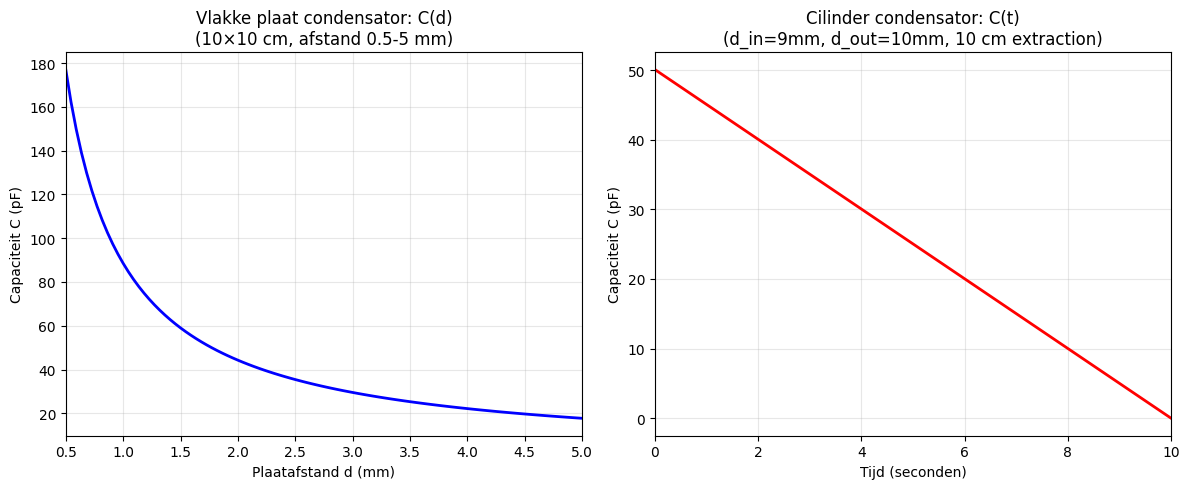

VLAKKE PLAAT CONDENSATOR:
  Formule: C = ε₀ εᵣ A / d
  Voor constante A en εᵣ: C ∝ 1/d
  Dus: Als d 10× groter wordt, C wordt 10× kleiner
  Voorspelling: 10.0× afname 
CILINDER CONDENSATOR:
  Formule: C = 2π ε₀ εᵣ L r_i / Δr
  Voor constante r_i, Δr, εᵣ: C ∝ L
  Dus: Als L lineair afneemt, C neemt lineair af
  Voorspelling: inf× afname (lineair) 


C:\Users\tijlg\AppData\Local\Temp\ipykernel_12184\1323923315.py:82: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"  Voorspelling: {C_cilinder_range[0]/C_cilinder_range[-1]:.0f}× afname (lineair) ")


In [24]:
# 1. VLAKKE PLAAT: Afstand verandert van 0.5 mm tot 5 mm
print("1. VLAKKE PLAAT CONDENSATOR MET VERANDERENDE AFSTAND")

A_vlak = 0.1 * 0.1  # 10×10 cm = 0.01 m²

# Afstanden variëren van 0.5 mm tot 5 mm
d_min = 0.5e-3  # m
d_max = 5e-3    # m
n_points = 100

d_range = np.linspace(d_min, d_max, n_points)  # lineaire toename
C_vlak_range = vlakkeplaat(A_vlak, d_range, epsilon_r=1)

# Plot 1: Vlakke plaat
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(d_range * 1e3, C_vlak_range * 1e12, 'b-', linewidth=2)
plt.xlabel('Plaatafstand d (mm)')
plt.ylabel('Capaciteit C (pF)')
plt.title('Vlakke plaat condensator: C(d)\n(10×10 cm, afstand 0.5-5 mm)')
plt.grid(True, alpha=0.3)
plt.xlim(d_min * 1e3, d_max * 1e3)

# Toon enkele specifieke waarden
print(f"Plaatafstand: {d_min*1e3:.1f} - {d_max*1e3:.1f} mm")
print(f"Capaciteit bij {d_min*1e3:.1f} mm: {C_vlak_range[0]*1e12:.2f} pF")
print(f"Capaciteit bij {d_max*1e3:.1f} mm: {C_vlak_range[-1]*1e12:.2f} pF")
print(f"Verhouding C(0.5mm)/C(5mm) = {C_vlak_range[0]/C_vlak_range[-1]:.1f}×")

# 2. CILINDER: Binnencilinder wordt uitgetrokken in 10 seconden
print("2. CILINDER CONDENSATOR MET UITGETROKKEN BINNENCILINDER")

# Cilinder parameters
L_cilinder_initial = 0.1  # 10 cm totale lengte
d_inner = 4.5e-3  # 9 mm diameter → 4.5 mm radius
d_outer = 5e-3    # 10 mm diameter → 5 mm radius
r_inner = d_inner / 2
r_outer = d_outer / 2
delta_r = r_outer - r_inner

# Tijd: 0 tot 10 seconden
t_total = 10  # seconden
time_array = np.linspace(0, t_total, n_points)

# Effectieve lengte van binnencilinder: begint op 10 cm, eindigt op 0
# Lineaire afname: L(t) = L_initial * (1 - t/t_total)
L_effective = L_cilinder_initial * (1 - time_array / t_total)

# Capacitance als functie van effectieve lengte
C_cilinder_range = cilinder(L_effective, r_inner, r_outer, epsilon_r=1)

# Plot 2: Cilinder
plt.subplot(1, 2, 2)
plt.plot(time_array, C_cilinder_range * 1e12, 'r-', linewidth=2)
plt.xlabel('Tijd (seconden)')
plt.ylabel('Capaciteit C (pF)')
plt.title('Cilinder condensator: C(t)\n(d_in=9mm, d_out=10mm, 10 cm extraction)')
plt.grid(True, alpha=0.3)
plt.xlim(0, t_total)

# Toon enkele specifieke waarden
print(f"Tijd: 0 - {t_total} seconden")
print(f"Capaciteit op t=0s (volledig ingebracht): {C_cilinder_range[0]*1e12:.2f} pF")
print(f"Capaciteit op t={t_total}s (volledig uitgetrokken): {C_cilinder_range[-1]*1e12:.2f} pF")
print(f"Verhouding C(0s)/C(10s) = {C_cilinder_range[0]/C_cilinder_range[-1]:.0f}×")

plt.tight_layout()
plt.show()

# ANALYSE VAN RESULTATEN
print("VLAKKE PLAAT CONDENSATOR:")
print(f"  Formule: C = ε₀ εᵣ A / d")
print(f"  Voor constante A en εᵣ: C ∝ 1/d")
print(f"  Dus: Als d 10× groter wordt, C wordt 10× kleiner")
print(f"  Voorspelling: {C_vlak_range[0]/C_vlak_range[-1]:.1f}× afname ")

print("CILINDER CONDENSATOR:")
print(f"  Formule: C = 2π ε₀ εᵣ L r_i / Δr")
print(f"  Voor constante r_i, Δr, εᵣ: C ∝ L")
print(f"  Dus: Als L lineair afneemt, C neemt lineair af")
print(f"  Voorspelling: {C_cilinder_range[0]/C_cilinder_range[-1]:.0f}× afname (lineair) ")


## Stop hier met werken tot na de fysieke ontwerpopdracht in week 3.

### 6) Reflectie opdracht voor na de fysieke ontwerpopdracht


Als het goed is, heeft ieder teamlid van deze simulatie-opdracht een andere opstelling ontworpen hebben tijdens de fysieke ontwerpopdracht. Kies in goed overleg voor deze opdracht een van jullie twee ontwerpen.

Voeg hieronder eerst een foto in van je opstelling die je gekozen hebt.

Jullie gaan in deze opdracht het verschil tussen jullie voorspelde verband en jullie uiteindelijke verkregen kalibratie grafiek proberen te verklaren. Er zijn hiervoor drie mogelijke paden die jullie kunnen kiezen om te onderzoeken, Kies deel a, b of c en werk die volledig uit voor jullie ontwerp. Let op je hoeft er maar een uit te werken.

Verander de tekst hieronder zodat deze naar jouw foto verwijst. Zorg dat de foto in de map figures staat!
![figure 5.1](figures/Condensator_1_uF.jpg)

#### Vraag 6a: Dunne laag niet meegerekende diëlektricum
Deze vraag is goed om te kiezen als je in je ontwerp een kleine laag extra materiaal hebt en deze tijdens de ontwerpopdracht niet hebben meegenomen in je theoretisch kalibratie grafiek.

1. Maak een nieuwe schets van je opstelling waarbij je de dikte van het extra diëlektricum meeneemt.
2. Leid de analytische oplossing af van de capaciteit van de hierboven getekende situatie.
3. Programmeer de analytische oplossing in python.
4. Maak hierna een plot van het kalibratiegrafiek, oude en nieuwe analytische oplossing in een grafiek.
5. Beschrijf en verklaar de verschillen tussen de grafieken.


##### Antwoorden 6a

*Laat in deze cel je analytische oplossing met schets zien, dit mag met foto's of via LATEX.*

In [149]:
# Schrijf hier de code voor je oplossing. Gebruik hier je eerder gemaakte functies
# def condensator_extra_laag(#jouw variabelen): # Schrijf hier jouw functie
    ## je functie


### Maak hier je plot

##### Antwoorden 6a

*Beschrijf en verklaar je verschillen in deze markdown cel.*

#### Vraag 6b1: Lading op een condensator met het edge effect meegenomen

In deze opdracht gaan we verder in op het Edge effect en de invloed daarvan op de praktische capaciteit. Deze opdracht bouwt voort op de vraag 4.3.
Jullie hebben tijdens de ontwerpopdracht vierkante platen gebruikt in tegenstelling tot de ronde platen waarvoor de factoren in figure[label] zijn afgeleid. Er is onderzoek gedaan naar de factoren waarmee de praktische capaciteit vergeleken met de daadwerkelijke capaciteit verschilt dat onderzoek vind je hier: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=311759. Zoek in het onderzoek tabel 1 en formules 22 en 36 op.

1. Vergelijk de factor waarmee de schijf(disk) condensator verschilt met die van de vierkante plaat, kunnen we de vierkante plaat factor benaderen met de factor voor een disk condensator? Vergelijk het procentuele verschil tussen de factoren van de circulaire en vierkante platen, met de onzekerheden die in de meting zitten.



##### Antwoord 6b1

*Vergelijk hier de factoren tussen de circulaire en vierkante vlakke plaat condensatoren.*

#### Vraag 6b2: Capaciteit van een condensator met het edge effect meegenomen

Vanaf hier nemen we aan dat factor van de circulaire platen ongeveer gelijk is aan de factor voor vierkante platen. De factor die de capaciteit van de vlakke plaat approximatie linkt aan de werkelijke capaciteit noemen we vanaf nu de idealiteitsfactor.

1. Bereken de daadwerkelijke theoretische capaciteit van de condensator uit de sanity check 3 van de fysieke ontwerpopdracht en print deze op een nette manier.
2. Vergelijk dit met de daadwerkelijke theoretische capaciteit met de capaciteit die je op de dag zelf hebt gemeten.

Vanaf hier gaan we verder met jullie sensor van de ontwerpopdracht "Maak een sensor met condensatoren":

3. Reken je theoretische kalibratie grafiek om met de idealiteitsfactor.
4. Vergelijk je nieuwe theoretische kalibratiegrafiek van je praktische kalibratiegrafiek van de dag zelf.

In [150]:
# Schrijf hier jouw code die de vlakke plaat capaciteit omschrijft naar de werkelijke capaciteit

# def C_niet_ideaal(#relevante parameters):
    # Jouw berekeningen


##### Antwoorden 6b2

*Doe in deze markdown cel je vergelijkingen voor de sanity check condensator en je kalibratiegrafiek.*

#### Vraag 6c: Niet linear diëlektricum optie 1

Niet alle materialen zijn een lineair diëlektricum. Een aantal van de materialen die sterk niet lineair gedrag vertonen zijn: sponzen, foam & rubber. Als je in je opdracht een materiaal gebruikt heb waarvan je verwacht dat het verband sterk niet lineair is kan dit een hele goede opdracht zijn.
| Materiaal |$\chi_2$   |
| :-------------|:-------------|
| Spons|  |

Als jouw materiaal hier niet tussen staat dan kan je zelf op zoek naar een waarde van $\chi_2$ in de literatuur.

#### Vraag 6c1

1. Leidt het D veld van de condensator af uit de wet van Gauss.
2. Vindt een analytische uitdrukking voor het elektrisch veld in termen van het D veld.

##### Antwoorden 6c 1

*Antwoord vraag 6c 1.*

#### Vraag 6c2

1. Programmeer je oplossingen voor het D en E veld in python, gebruik het D veld uit je fysieke ontwerpopdracht.

Als je het elektrische veld van een vierkante vlakke plaat condensator weet kan je de capaciteit berekenen met de onderstaande formule:
$C = \frac{A
E_z \epsilon_0}{\Delta V}$

2. Plot de capaciteit van het niet lineaire diëlektricum, het theoretische kalibratiegrafiek en de uiteindelijke kalibratiegrafiek van de fysieke ontwerpopdracht.
3. Verklaar verschillen tussen de grafieken.

In [151]:
 # Pas deze code aan zodat jouw opstelling doorgerekend wordt
def E_condensator(x1, x2, D):
    return None

In [160]:
git add .
git commit -m "WIP: lokale wijzigingen"




SyntaxError: invalid syntax (3891607024.py, line 1)

#### Vraag 7

Hoeveel van de afwijking tussen je metingen en je oorspronkelijke voorspelde kalibratiegrafiek wordt verklaard door wat je bij vraag 6 hebt uitgerekend? Kan je een (aantal) elektrisch veld en capaciteit gerelateerde reden(en) verzinnen wat de rest van de afwijking tussen meting en voorspelde kalibratiegrafiek kan verklaren.

##### Antwoorden 7

*Antwoord vraag 7, de laatste.*